# Analyzing MO Results!

In [2]:
# Load libraries
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import itertools

from utils_analysis import plot_interactive, hypervolume, sparsity

Notes:

- iter_<>.json files corresponds to (iter + 1). 
- There is no overlap between the the different executions.

Objectives:
- Get CCS the points and compute the Hypervolume and sparsity

In [3]:
# No reuse
res_dir = "ols_no_reuse/outputs/seed1234/"
# res_dir = "ols_no_reuse/outputs/seed1244/"
# res_dir = "ols_no_reuse/outputs/seed1254/"

# Partial reuse
# res_dir = "ols_partial_reuse\outputs\seed1234"
# res_dir = "ols_partial_reuse\outputs\seed1244"
res_dir = "ols_partial_reuse\outputs\seed1254"

# RA
# res_dir = "ra\outputs\seed1234"
# res_dir = "ra\outputs\seed1244"
# res_dir = "ra\outputs\seed1254"

# # PF
# res_dir = "pf\outputs\seed1234"
# res_dir = "pf\outputs\seed1244"
res_dir = "pf\outputs\seed1254"

# CBM
# res_dir = "cbm\outputs\seed1234"

In [4]:
# Go to execution directory 
try:
    os.chdir("../../results/greenlight/" + res_dir)
except:
    try:
        os.chdir("../../../" + res_dir)
    except:
        try:
            os.chdir("../../../results/greenlight/" + res_dir)
        except:
            pass
    pass
os.getcwd()

'C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\results\\greenlight\\pf\\outputs\\seed1254'

In [5]:
# Get all iter filenames
jsons = glob.glob('*/iters/iter_[0-9]*.json')

result_files = []
for idx in range(1,500):
    try:
        f = [i for i in jsons if f"iter_{idx}.json" in i][-1]
    except:
        break
    result_files.append(f)
tot_iterations = idx - 1
print(f"Execution contains {tot_iterations} iterations.")

Execution contains 121 iterations.


In [6]:
# Read last iteration and plot ccs
final_json = json.load(open(result_files[-1]))

In [7]:
# Plot interactive
fig = plot_interactive(final_json["ccs"], size=[1000, 600])

In [8]:
def plot_interactive_plt(ccs, 
                     obj=[0, 1, 2], 
                     labels=["Maintenance cost", "Carbon emissions", "User cost"],
                     size=[10, 10], color="blue", marker=".", markersize=25, ax=None, label="label", hasEdge=False):

    ccs_arr = np.stack(ccs)
    df = pd.DataFrame({labels[0]: ccs_arr[:, 0], labels[1]: ccs_arr[:, 1], labels[2]: ccs_arr[:, 2]})
    
    

    if len(obj) == 3:
        if not ax:
            fig = plt.figure(figsize = size)
            ax = plt.axes(projection ="3d")
        ax.scatter3D(df[labels[0]], df[labels[1]], df[labels[2]], color = color, marker=marker, s=markersize, alpha=0.7, label=label)
        ax.set_xlabel(labels[0])
        ax.set_ylabel(labels[1])
        ax.set_zlabel(labels[2])
    else:
        if not ax:
            fig, ax = plt.subplots(figsize = size)
        if not hasEdge:
            ax.scatter(df[labels[obj[0]]], df[labels[obj[1]]], color = color, marker=marker, s=markersize, alpha=0.7, label=label)
        else:
            ax.scatter(df[labels[obj[0]]], df[labels[obj[1]]], color = 'None', edgecolors=color, marker=marker, s=markersize, alpha=0.7, label=label)
        ax.set_xlabel(labels[obj[0]], size=14)
        ax.set_ylabel(labels[obj[1]], size=14)

    # tight layout
#     fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=size[0], height=size[1])
    ax.grid()
#     fig.show()
    return ax

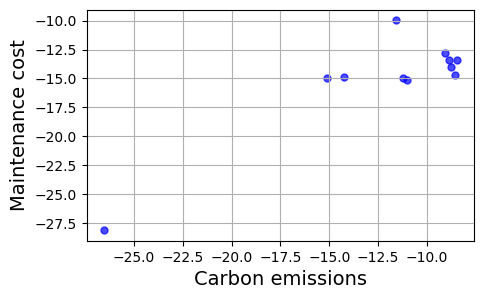

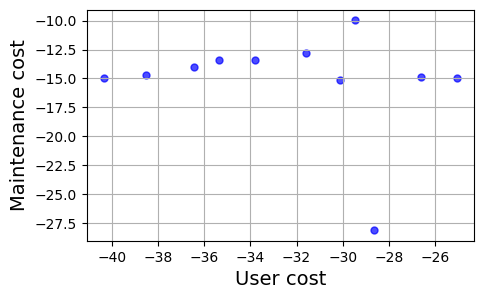

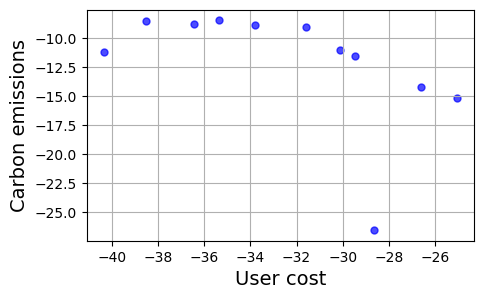

In [9]:
from ipywidgets import IntSlider, interact, FloatSlider

# @interact(iteration = IntSlider(min = 0, max = tot_iterations))
def execute(iteration):
    final_json = json.load(open(result_files[iteration]))
    for obj in list(itertools.permutations([0, 1, 2], 2)):
        if obj[0] <= obj[1]: continue

#         plot_interactive(final_json["ccs"], obj=obj, size=[500, 300], 
#                         labels=["Objective 3", "Objective 2", "Objective 1"])
        plot_interactive_plt(final_json["ccs"], obj=obj, size=[5, 3], color="blue", marker='o')
        
execute(tot_iterations-1)

# Markers: 
# Rectangle: marker = (4, 0, 45) --> OLS-NR
# Cross: (4,2) --> OLS-PR
# Star: (5, 2) --> RA
# Cyrcle: "o" --> PFA

# fig = plot_interactive_plt(final_json["ccs"], size=[10, 10])

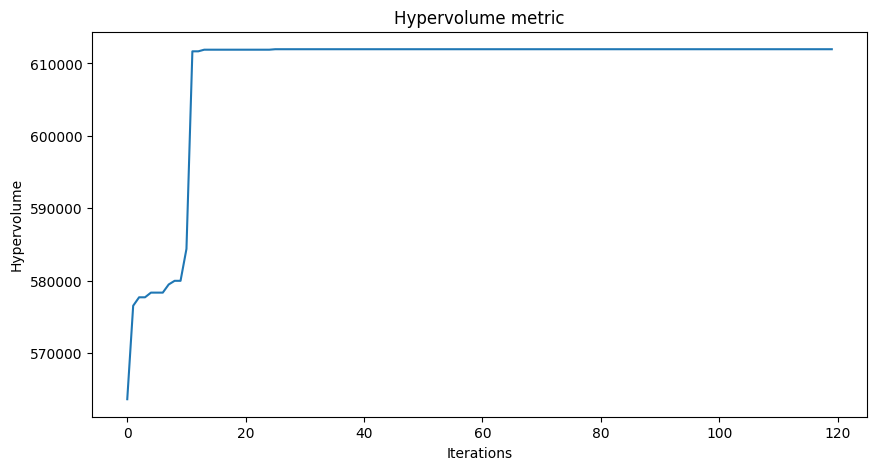

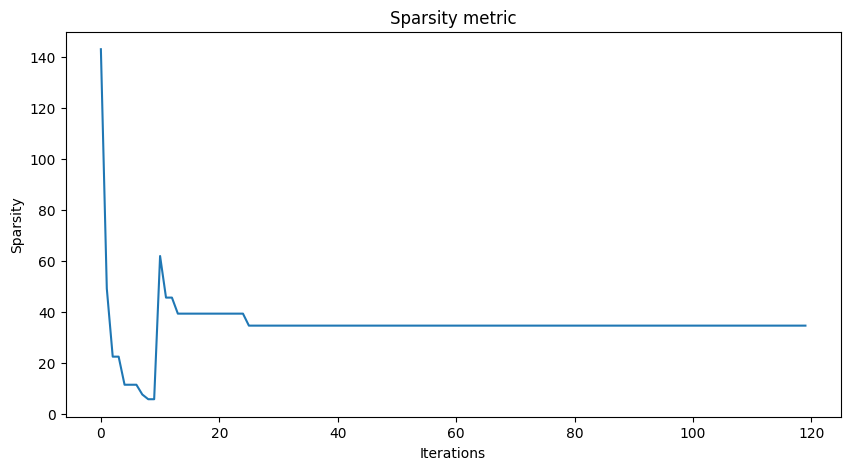

Final Hypervolume: 611965.7173083756
Final Sparsity: 34.64521805623581


In [10]:
# Compute the Hypervolume and sparsity metrics
plt.rcParams["figure.figsize"] = (10,5)
HV = []
sp = []
for it in range(1,tot_iterations):
    json_file = json.load(open(result_files[it]))
    ccs_arr = np.array(json_file["ccs"])
    ccs_arr += 100
    hv = hypervolume(np.ones(3)*0, -ccs_arr)
    spar = sparsity(ccs_arr)
    HV.append(hv)
    sp.append(spar)
    
plt.plot(HV, label="Hypervolume")
plt.title("Hypervolume metric")
plt.ylabel("Hypervolume")
plt.xlabel("Iterations")
plt.show()

plt.plot(sp, label="Sparsity")
plt.title("Sparsity metric")
plt.ylabel("Sparsity")
plt.xlabel("Iterations")
plt.show()

print(f"Final Hypervolume: {HV[-1]}")
print(f"Final Sparsity: {sp[-1]}")

### OLS - no reuse
seed 1234:
Final Hypervolume: 775161.0302715392
Final Sparsity: 18.68394264067051


seed1244:
Final Hypervolume: 784450.1395422177
Final Sparsity: 7.958373256709881

seed1254:
Final Hypervolume: 772982.4566520216
Final Sparsity: 6.325232397371045

### OLS - partial reuse
seed 1234:
Final Hypervolume: 792041.0450040568
Final Sparsity: 4.0156905555432285

seed 1244:
Final Hypervolume: 791109.3825612155
Final Sparsity: 5.922565105340141

seed 1254:
Final Hypervolume: 777851.2903586661
Final Sparsity: 3.751233270779103

### RA
seed 1234:
Final Hypervolume: 753048.4151355042
Final Sparsity: 150.82020294396034

seed 1244:
Final Hypervolume: 757946.9196102633
Final Sparsity: 95.14914230684408

Seed 1254:
Final Hypervolume: 733623.7384977506
Final Sparsity: 183.2413784680065

### PFA
seed 1234:
Final Hypervolume: 624637.5772398681
Final Sparsity: 11.548961590996942

Seed 1244:
Final Hypervolume: 626173.1559710773
Final Sparsity: 8.497967661918047

Seed 1254:
Final Hypervolume: 611965.7173083756
Final Sparsity: 34.64521805623581


[0.05,
 0.05045000000000001,
 0.0509,
 0.05135000000000001,
 0.0518,
 0.052250000000000005,
 0.052700000000000004,
 0.05315000000000001,
 0.0536,
 0.05405000000000001,
 0.0545,
 0.054950000000000006,
 0.055400000000000005,
 0.055850000000000004,
 0.0563,
 0.05675,
 0.05720000000000001,
 0.05765000000000001,
 0.0581,
 0.058550000000000005,
 0.059000000000000004,
 0.05945,
 0.0599,
 0.06035,
 0.0608,
 0.06125,
 0.061700000000000005,
 0.06215000000000001,
 0.0626,
 0.06305000000000001,
 0.0635,
 0.06395,
 0.0644,
 0.06485,
 0.0653,
 0.06575,
 0.06620000000000001,
 0.06665,
 0.0671,
 0.06755,
 0.068,
 0.06845000000000001,
 0.0689,
 0.06935,
 0.0698,
 0.07025,
 0.0707,
 0.07115,
 0.0716,
 0.07205,
 0.07250000000000001,
 0.07295,
 0.07339999999999999,
 0.07385,
 0.0743,
 0.07475,
 0.0752,
 0.07565000000000001,
 0.0761,
 0.07655,
 0.077,
 0.07745,
 0.0779,
 0.07835,
 0.0788,
 0.07925,
 0.07970000000000001,
 0.08015,
 0.0806,
 0.08105000000000001,
 0.0815,
 0.08195,
 0.0824,
 0.082850000000000

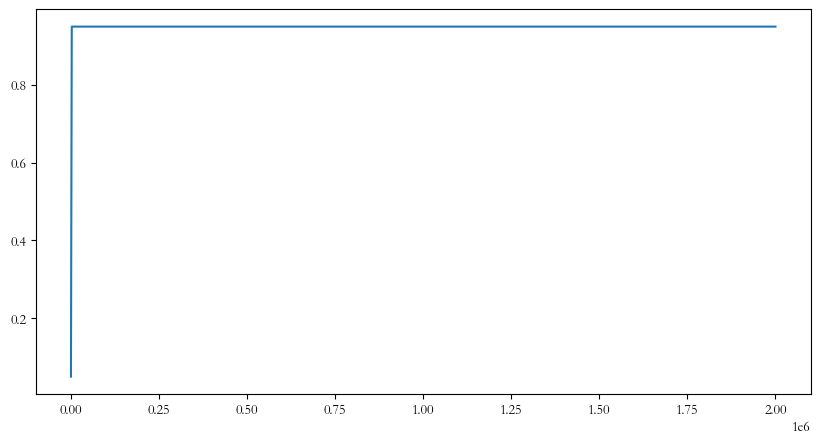

In [94]:
epsilon0 = 0.05
epsilon1 = 0.95
episodes = 2000000

vals = []
for ep in range(episodes):

    xx = np.max((np.min((epsilon0*(1-ep/(.001*episodes)) + epsilon1*(ep/(.001*episodes)),epsilon1)),0))
    vals.append(xx)
    
plt.plot(vals)

vals[:100]



In [99]:
np.where(np.array(vals) == 0.95)[0]
# episodes*0.001

array([   2000,    2001,    2002, ..., 1999997, 1999998, 1999999],
      dtype=int64)

In [17]:
res_dirs = {
    "DOL": {"res_dir": "ols_no_reuse/outputs", "color":"blue", "marker":(4,2), "hasEdge": False},
    "DOL-PR": {"res_dir": "ols_partial_reuse\outputs", "color":"green", "marker":(5, 2), "hasEdge": False},
    "RA": {"res_dir": "ra\outputs", "color":"red", "marker":(4, 0, 45), "hasEdge": True},
    "PF":  {"res_dir": "pf\outputs", "color":"orange", "marker":"o", "hasEdge": True},
#     "CBM": {"res_dir": "cbm\outputs\seed1234", "color":"purple", "marker":"D", "hasEdge": True}
}

seeds = ["/seed1234", "/seed1244", "/seed1254"]

results = []

for method, inputs in res_dirs.items():
    res_dir = inputs["res_dir"]
    
    for seed in seeds:
        # Go to execution directory 
        try:
            os.chdir("../../results/greenlight/" + res_dir + seed)
        except:
            try:
                os.chdir("../../../" + res_dir + seed)
            except:
                pass
            pass

#         print(os.getcwd())

        # Read all files
        jsons = glob.glob('*/iters/iter_[0-9]*.json')

        result_files = []
        for idx in range(1,500):
            try:
                f = [i for i in jsons if f"iter_{idx}.json" in i][-1]
            except:
                break
            result_files.append(f)
        tot_iterations = idx - 1
#         print(f"Execution contains {tot_iterations} iterations.")

        final_json = json.load(open(result_files[-1]))
#         print(f"Execution contains {len(final_json['ccs'])} CS points")

        # Plot HV and Sparsity
        HV = []
        sp = []
        for it in range(1,tot_iterations):
            json_file = json.load(open(result_files[it]))
            ccs_arr = np.array(json_file["ccs"])
            ccs_arr += 100
            hv = hypervolume(np.ones(3)*0, -ccs_arr)
            spar = sparsity(ccs_arr)
            HV.append(hv)
            sp.append(spar)

#         print(f"Execution Hypervolume is {HV[-1]}")
#         print(f"Execution Spartisy is {sp[-1]}")
        
        results.append([res_dir, seed, tot_iterations, len(final_json['ccs']), np.around(HV[-1], 2), np.around(sp[-1], 2)])

Seed Iterations CS Points         HV Sparsity
Algo                                                                         
ols_no_reuse/outputs       /seed1244         96        70  784450.14     7.96
ols_partial_reuse\outputs  /seed1234        119        97  792041.05     4.02
ra\outputs                 /seed1244         66        22  757946.92    95.15
pf\outputs                 /seed1244        121        29  626173.16      8.5

In [41]:
vals = pd.DataFrame(data=np.stack(results), columns = ["Algo", "Seed", "Iterations", "CS Points", "HV", "Sparsity"])

final_res = vals[vals.HV.isin(max_hv.unique())].set_index("Algo")

stds = vals.groupby("Algo")[["Iterations", "CS Points", "HV", "Sparsity"]].std().round(2)
stds

final_res["Iterations_std"] = stds["Iterations"]
final_res["CS Points_std"] = stds["CS Points"]
final_res["HV_std"] = stds["HV"]
final_res["Sparsity_std"] = stds["Sparsity"]
final_res

Seed Iterations CS Points         HV Sparsity  \
Algo                                                                            
ols_no_reuse/outputs       /seed1244         96        70  784450.14     7.96   
ols_partial_reuse\outputs  /seed1234        119        97  792041.05     4.02   
ra\outputs                 /seed1244         66        22  757946.92    95.15   
pf\outputs                 /seed1244        121        29  626173.16      8.5   

                           Iterations_std  CS Points_std    HV_std  \
Algo                                                                 
ols_no_reuse/outputs                23.12          13.61   6090.18   
ols_partial_reuse\outputs           14.01           9.45   7937.19   
ra\outputs                           0.00           3.79  12864.23   
pf\outputs                           0.00           9.02   7797.28   

                           Sparsity_std  
Algo                                     
ols_no_reuse/outputs               6.71  
ols_partial_reuse\outputs          1.18  
ra\outputs                        44.55  
pf\outputs                        14.30

In [38]:
stds = vals.groupby("HV")[["Algo", "Iterations", "CS Points", "Sparsity"]].max().reset_index().set_index("Algo")
# stds
max_hv = vals.groupby("Algo")["HV"].max()
max_hv.unique()

array(['784450.14', '792041.05', '626173.16', '757946.92'], dtype=object)

C:\Users\goust\Documents\EARLY_YEARS\Master\TU Delft\Thesis_project\results\greenlight\ols_no_reuse\outputs\seed1244
Execution contains 96 iterations.
Execution contains 70 CS points
Execution Hypervolume is 784450.1395422177
Execution Spartisy is 7.958373256709881
[664272.3442101162, 677722.4631999482, 679086.5731157088, 735921.6796303117, 748949.1186963622, 750385.1885069477, 758984.3394079469, 762064.5735330723, 762546.6632896434, 763258.3745282304, 765063.0051586898, 766121.240158967, 768940.0807147278, 772004.6586326044, 772816.2329293767, 773121.8693038579, 773361.3958739566, 777274.1699115881, 777472.770988955, 777566.3641740683]
C:\Users\goust\Documents\EARLY_YEARS\Master\TU Delft\Thesis_project\results\greenlight\ols_partial_reuse\outputs\seed1234
Execution contains 119 iterations.
Execution contains 97 CS points
Execution Hypervolume is 792041.0450040568
Execution Spartisy is 4.0156905555432285
[670099.1452531277, 683361.7975404914, 689734.8536835834, 747202.3590470247, 75740

<function matplotlib.pyplot.show(close=None, block=None)>

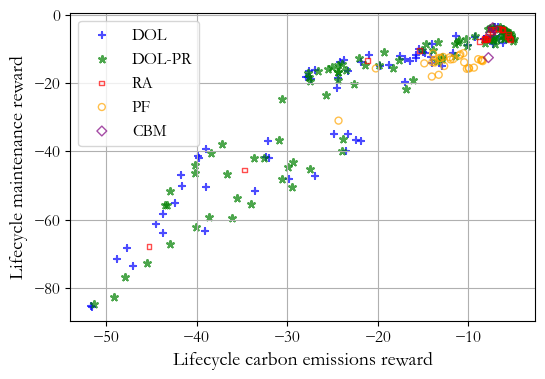

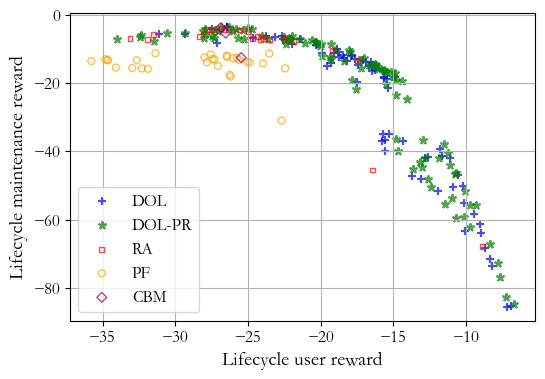

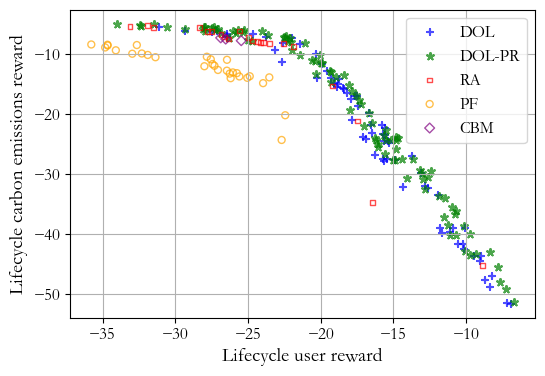

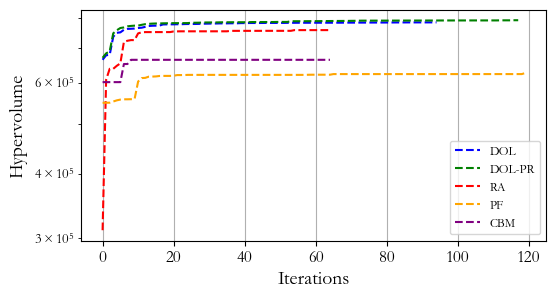

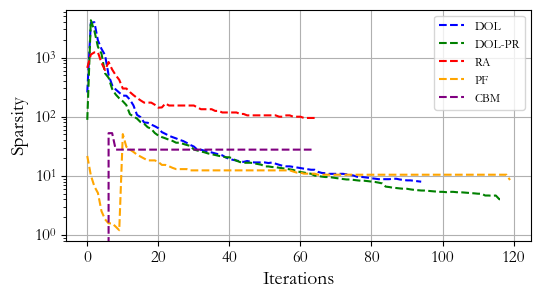

In [42]:
plt.rcParams["figure.figsize"] = (6,12)
plt.rcParams["font.family"] = "garamond"
#### Plot comparative CS:
res_dirs = {
    "DOL": {"res_dir": "ols_no_reuse/outputs/seed1244/", "color":"blue", "marker":(4,2), "hasEdge": False},
    "DOL-PR": {"res_dir": "ols_partial_reuse\outputs\seed1234", "color":"green", "marker":(5, 2), "hasEdge": False},
    "RA": {"res_dir": "ra\outputs\seed1244", "color":"red", "marker":(4, 0, 45), "hasEdge": True},
    "PF":  {"res_dir": "pf\outputs\seed1244", "color":"orange", "marker":"o", "hasEdge": True},
    "CBM": {"res_dir": "cbm\outputs\seed1234", "color":"purple", "marker":"D", "hasEdge": True}
}

fig1, ax1 = plt.subplots(figsize=(6, 4))
fig2, ax2 = plt.subplots(figsize=(6, 4))
fig3, ax3 = plt.subplots(figsize=(6, 4))
ax = [ax1, ax2, ax3]
fig_hv, ax_hv = plt.subplots(figsize=(6, 3))
fig_sp, ax_sp = plt.subplots(figsize=(6, 3))

for method, inputs in res_dirs.items():
    res_dir = inputs["res_dir"]
    # Go to execution directory 
    try:
        os.chdir("../../results/greenlight/" + res_dir)
    except:
        try:
            os.chdir("../../../" + res_dir)
        except:
            pass
        pass

    print(os.getcwd())
    
    # Read all files
    jsons = glob.glob('*/iters/iter_[0-9]*.json')

    result_files = []
    for idx in range(1,500):
        try:
            f = [i for i in jsons if f"iter_{idx}.json" in i][-1]
        except:
            break
        result_files.append(f)
    tot_iterations = idx - 1
    print(f"Execution contains {tot_iterations} iterations.")
    
    final_json = json.load(open(result_files[-1]))
    print(f"Execution contains {len(final_json['ccs'])} CS points")
    
    

    labels=["Lifecycle maintenance reward", "Lifecycle carbon emissions reward", "Lifecycle user reward"]
    
    # Plot
    # TODO: Assign markers, sizes, colors to each objective
    iteration = tot_iterations-1
    final_json = json.load(open(result_files[iteration]))
    idx = 0
    for obj in list(itertools.permutations([0, 1, 2], 2)):
        if obj[0] <= obj[1]: continue

#         plot_interactive(final_json["ccs"], obj=obj, size=[500, 300])
        plot_interactive_plt(final_json["ccs"], obj=obj, size=[5, 3], color=inputs["color"], marker=inputs["marker"], 
                             ax=ax[idx], label=method, hasEdge=inputs["hasEdge"], labels=labels)
        idx += 1
    
    for i in range(3):
        ax[i].legend(fontsize=12)
        ax[i].tick_params(axis='x', labelsize=12)
        ax[i].tick_params(axis='y', labelsize=12)
        ax[i].grid(True)
        
        
    # Plot HV and Sparsity
    HV = []
    sp = []
    for it in range(1,tot_iterations):
        json_file = json.load(open(result_files[it]))
        ccs_arr = np.array(json_file["ccs"])
        ccs_arr += 100
        hv = hypervolume(np.ones(3)*0, -ccs_arr)
        spar = sparsity(ccs_arr)
        HV.append(hv)
        sp.append(spar)
        
    print(f"Execution Hypervolume is {HV[-1]}")
    print(f"Execution Spartisy is {sp[-1]}")

    ax_hv.plot(HV, label=method, color=inputs["color"], linestyle="--")
#     ax_hv.set_title("Hypervolume metric")
    ax_hv.set_ylabel("Hypervolume", size=14)
    ax_hv.set_xlabel("Iterations", size=14)
    ax_hv.legend(fontsize=9)
    ax_hv.tick_params(axis='x', labelsize=12)
    ax_hv.tick_params(axis='y', labelsize=12)
    ax_hv.grid(True)
    ax_hv.set_yscale('log')
    

    ax_sp.plot(sp, label=method, color=inputs["color"], linestyle="--")
#     ax_sp.set_title("Sparsity metric")
    ax_sp.set_ylabel("Sparsity", size=14)
    ax_sp.set_xlabel("Iterations", size=14)
    ax_sp.legend(fontsize=9)
    ax_sp.tick_params(axis='x', labelsize=12)
    ax_sp.tick_params(axis='y', labelsize=12)
    ax_sp.grid(True)
    ax_sp.set_yscale('log')
plt.show

In [76]:
plt.rcParams["figure.figsize"] = (5,3)
os.chdir(r"C:\Users\goust\Documents\EARLY_YEARS\Master\TU Delft\Thesis_project\TUD_thesis_project\jupyter_notebooks\timing")
os.getcwd()



methods = ["ols_nr", "ols_partial", "pf", "ra"]

for method in methods:
    # Read all files
    files = os.listdir(".")

    files_scanned = 0
    init_flag = False
#     result_files = []
    for filee in files:
        if method in filee:
            files_scanned += 1
            if init_flag:
                df_tmp = pd.read_csv(filee)
                df_tmp["Value"] = df_tmp["Value"] + df["Value"].max()
                df = pd.concat([df, df_tmp])
            else:
                df = pd.read_csv(filee)
                init_flag = True

    times = df["Value"].to_numpy()/60
    diffs = np.append(np.diff(times), times[0])

#     plt.hist(diffs)
#     plt.title(method)
#     plt.show()
    
    print(f"Experiment: {method}")
    print(f"   Files scanned: {files_scanned}")
    print(f"   Total points: {len(diffs)}")
    print(f"   Average time: {np.mean(diffs):.2f}")
    print(f"   Std: {np.std(diffs):.2f}")

In [77]:
import datetime
# Analyze CBM
cbm_log = r"C:\Users\goust\Documents\EARLY_YEARS\Master\TU Delft\Thesis_project\results\greenlight\cbm\outputs\seed1234\exp1\logs\20230429001348_854.log"

logg = open(cbm_log, "r").readlines()

timing_lines = []
pattern = "CBM return for weights:"
for line in logg:
    if pattern in line:
        
        timeStr = line.split("[")[0][:-1]
        
        import datetime
        timeObj = datetime.datetime.strptime(timeStr, "%Y-%m-%d %H:%M:%S,%f")
        
#         time.strptime(timeStr, '%H:%M:%S,%f').total_seconds()/60.0
        timing_lines.append(timeObj)
        
diffs = []
for i in range(1,len(timing_lines)):
    min_diff = (timing_lines[i] - timing_lines[i-1]).total_seconds() / 60.0
    diffs.append(min_diff)

    
diffs = np.array(diffs)
diffs = diffs[diffs < 15]
diffs = diffs[diffs > 7]
plt.hist(diffs)

print(f"Experiment: cbm")
print(f"   Files scanned: {1}")
print(f"   Total points: {len(diffs)}")
print(f"   Average time: {np.mean(diffs):.2f}")
print(f"   Std: {np.std(diffs):.2f}")

Seed 1234:
* Final Hypervolume: 51001.37465427368
* Final Sparsity: 18.68394264067051

Seed 1244:
* Final Hypervolume: 51439.89789642078
* Final Sparsity: 7.958373256709881

Seed 1254:
* Final Hypervolume: 55186.89559610035
* Final Sparsity: 6.325232397371045


# Returns of extreme executions

In [78]:
os.chdir('C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\results\\greenlight\\ols_no_reuse\\outputs\\seed1244')
os.getcwd()

'C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\results\\greenlight\\ols_no_reuse\\outputs\\seed1244'

In [79]:
user_cost_init = 0 #-611189745.7750719
carbon_init = -1019025101614.08 #0

In [80]:
# COST
actions_cost = np.loadtxt("greenlight_exp_cost_action.csv", delimiter=",").reshape((100, 20, 10))
rew_cost = np.loadtxt("greenlight_exp_cost_rew.csv", delimiter=",").reshape((100, 20, 3))
rew_cost[:,:,1] += carbon_init
rew_cost[:,:,2] -= user_cost_init

rew_mean_cost = np.mean(rew_cost, axis=0)
rew_mean_cum_cost = np.cumsum(rew_mean_cost, axis=0)

In [81]:
# CARBON
actions_carbon = np.loadtxt("greenlight_exp_carbon_action.csv", delimiter=",").reshape((100, 20, 10))
rew_carbon = np.loadtxt("greenlight_exp_carbon_rew.csv", delimiter=",").reshape((100, 20, 3)) 
rew_carbon[:,:,1] += carbon_init
rew_carbon[:,:,2] -= user_cost_init

rew_mean_carbon = np.mean(rew_carbon, axis=0)
rew_mean_cum_carbon = np.cumsum(rew_mean_carbon, axis=0)

In [82]:
# USER
actions_user = np.loadtxt("greenlight_exp_user_action.csv", delimiter=",").reshape((100, 20, 10))
rew_user = np.loadtxt("greenlight_exp_user_rew.csv", delimiter=",").reshape((100, 20, 3))
rew_user[:,:,1] += carbon_init
rew_user[:,:,2] -= user_cost_init

rew_mean_user = np.mean(rew_user, axis=0)
rew_mean_cum_user = np.cumsum(rew_mean_user, axis=0)

In [83]:
print(np.sum(rew_cost[:,:,2] > 0)/np.prod(rew_cost[:,:,2].shape))
print(np.sum(rew_carbon[:,:,2] > 0)/np.prod(rew_cost[:,:,2].shape))
print(np.sum(rew_user[:,:,2] > 0)/np.prod(rew_cost[:,:,2].shape))

0.0
0.0
0.0


In [84]:
# CBM
# COST
# actions_cost = np.loadtxt("greenlight_exp_cost_action.csv", delimiter=",").reshape((100, 20, 10))
rew_cost_cbm = np.loadtxt("greenlight_cbm_cost_rew.csv", delimiter=",").reshape((100, 20, 3))
rew_cost_cbm[:,:,1] += carbon_init
rew_cost_cbm[:,:,2] -= user_cost_init
rew_carbon_cbm = np.loadtxt("greenlight_cbm_carbon_rew.csv", delimiter=",").reshape((100, 20, 3))
rew_carbon_cbm[:,:,1] += carbon_init
rew_carbon_cbm[:,:,2] -= user_cost_init
rew_user_cbm = np.loadtxt("greenlight_cbm_user_rew.csv", delimiter=",").reshape((100, 20, 3))
rew_user_cbm[:,:,1] += carbon_init
rew_user_cbm[:,:,2] -= user_cost_init

# If we want to plot the CBM benchmarks:
# from copy import deepcopy
# rew_cost = deepcopy(rew_cost_cbm)
# rew_carbon = deepcopy(rew_carbon_cbm)
# rew_user = deepcopy(rew_user_cbm)

np.all(rew_carbon_cbm == rew_cost_cbm)

False

In [85]:

def discounted_sum(rewards):
    discounted_cumulative_sum = np.zeros_like(rewards)
    running_sum = np.zeros((100, 3))
    for i in range(rewards.shape[1]):
        running_sum = running_sum * gamma + rewards[:, i]
        discounted_cumulative_sum[:, i] = running_sum

    rewards_test_cum = discounted_cumulative_sum #[:, ::-1, :]
    return rewards_test_cum

regs = [-1, -1, -1]
gamma = 0.99
reg_co = np.mean(discounted_sum(rew_cost), axis=0)[-1, 0]
reg_ca = np.mean(discounted_sum(rew_carbon), axis=0)[-1, 1]
reg_ti = np.mean(discounted_sum(rew_user), axis=0)[-1, 2]

real = -1

if real > -1:
    reg_co = discounted_sum(rew_cost)[real, -1, 0]
    reg_ca = discounted_sum(rew_carbon)[real, -1, 1]
    reg_ti = discounted_sum(rew_user)[real, -1, 2]
# reg_co = np.sum(np.mean(rew_cost, axis=0), axis=0)[0]
# reg_ca = np.sum(np.mean(rew_carbon, axis=0), axis=0)[1]
# reg_ti = np.sum(np.mean(rew_user, axis=0), axis=0)[2]
regs = [reg_co, reg_ca, reg_ti]

#### Standard normalization

# x_new = (x - x_min)/(x_max-x_min)
reg_co_co_max = np.max(rew_cost[:, :, 0])
reg_ca_co_max = np.max(rew_carbon[:, :, 0])
reg_ti_co_max = np.max(rew_user[:, :, 0])
reg_co_max = max(reg_co_co_max, reg_ca_co_max, reg_ti_co_max)

reg_co_ca_max = np.max(rew_cost[:, :, 1])
reg_ca_ca_max = np.max(rew_carbon[:, :, 1])
reg_ti_ca_max = np.max(rew_user[:, :, 1])
reg_ca_max = max(reg_co_ca_max, reg_ca_ca_max, reg_ti_ca_max)

reg_co_ti_max = np.max(rew_cost[:, :, 2])
reg_ca_ti_max = np.max(rew_carbon[:, :, 2])
reg_ti_ti_max = np.max(rew_user[:, :, 2])
reg_ti_max = max(reg_co_ti_max, reg_ca_ti_max, reg_ti_ti_max)

regs_max = [reg_co_max, reg_ca_max, reg_ti_max]
# ================================================
reg_co_co_min = np.min(rew_cost[:, :, 0])
reg_ca_co_min = np.min(rew_carbon[:, :, 0])
reg_ti_co_min = np.min(rew_user[:, :, 0])
reg_co_min = min(reg_co_co_min, reg_ca_co_min, reg_ti_co_min)

reg_co_ca_min = np.min(rew_cost[:, :, 1])
reg_ca_ca_min = np.min(rew_carbon[:, :, 1])
reg_ti_ca_min = np.min(rew_user[:, :, 1])
reg_ca_min = min(reg_co_ca_min, reg_ca_ca_min, reg_ti_ca_min)

reg_co_ti_min = np.min(rew_cost[:, :, 2])
reg_ca_ti_min = np.min(rew_carbon[:, :, 2])
reg_ti_ti_min = np.min(rew_user[:, :, 2])
reg_ti_min = min(reg_co_ti_min, reg_ca_ti_min, reg_ti_ti_min)

regs_min = [reg_co_co_min, reg_ca_ca_min, reg_ti_ti_min]
regs = [reg_co_co_max-reg_co_co_min, reg_ca_ca_max-reg_ca_ca_min, reg_ti_ti_max-reg_ti_ti_min]

# ================= ONLY CARE ABOUT CBM - OPTIMAL comparison ===============================

reg_co_min = np.min(rew_cost[:, :, 0])
reg_ca_min = np.min(rew_carbon[:, :, 1])
reg_ti_min = np.min(rew_user[:, :, 2])

reg_co_max = np.max(rew_cost[:, :, 0])
reg_ca_max = np.max(rew_carbon[:, :, 1])
reg_ti_max = np.max(rew_user[:, :, 2])

regs_max = [reg_co_max, reg_ca_max, reg_ti_max]
regs_min = [reg_co_min, reg_ca_min, reg_ti_min]
regs = [reg_co_max-reg_co_min, reg_ca_max-reg_ca_min, reg_ti_max-reg_ti_min]

print(regs)
print(regs_min)


if (user_cost_init != 0) and (carbon_init == 0):
    print("with delta emissions")
    benchmarks = [-87.26, -196381669778.03, -18772271107803.13]
else:
    print("with absolute emissions")
    benchmarks = [-87.26, -18761841908049.414, -11276252216.00]



[47.419933753468904, 84524070767.97498, 47282359.97468567]
[-47.54822110467851, -1100223085040.877, -643252573.7898502]
with absolute emissions


In [86]:
# Normalize values
def normalize_min_max(arr, regs_min=None, regs=None):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            arr[i,j] = 1 - (arr[i,j] - np.array(regs_min))/np.array(regs) 

    return arr

normFlag = False

if normFlag:
    rew_cost = normalize_min_max(rew_cost, regs_min=regs_min, regs=regs)
    rew_carbon = normalize_min_max(rew_carbon, regs_min=regs_min, regs=regs)
    rew_user = normalize_min_max(rew_user, regs_min=regs_min, regs=regs)

    rew_cost_cbm = normalize_min_max(rew_cost_cbm, regs_min=regs_min, regs=regs)
    rew_carbon_cbm = normalize_min_max(rew_carbon_cbm, regs_min=regs_min, regs=regs)
    rew_user_cbm = normalize_min_max(rew_user_cbm, regs_min=regs_min, regs=regs)
else:
    rew_cost *=(-1)
    rew_carbon *=(-1)
    rew_user *=(-1)

    rew_cost_cbm *=(-1)
    rew_carbon_cbm *=(-1)
    rew_user_cbm *=(-1)
    
    

In [87]:
if real > -1:
    norm_label = \
    [
        discounted_sum(rew_cost)[real,-1,0],
        discounted_sum(rew_carbon)[real,-1,1],
        discounted_sum(rew_user)[real,-1,2]
    ]
else: # go with mean
    norm_label = \
    [
        np.mean(discounted_sum(rew_cost), axis=0)[-1,0],
        np.mean(discounted_sum(rew_carbon), axis=0)[-1,1],
        np.mean(discounted_sum(rew_user), axis=0)[-1,2]
    ]
    
norm_label = [1, 1, 1]

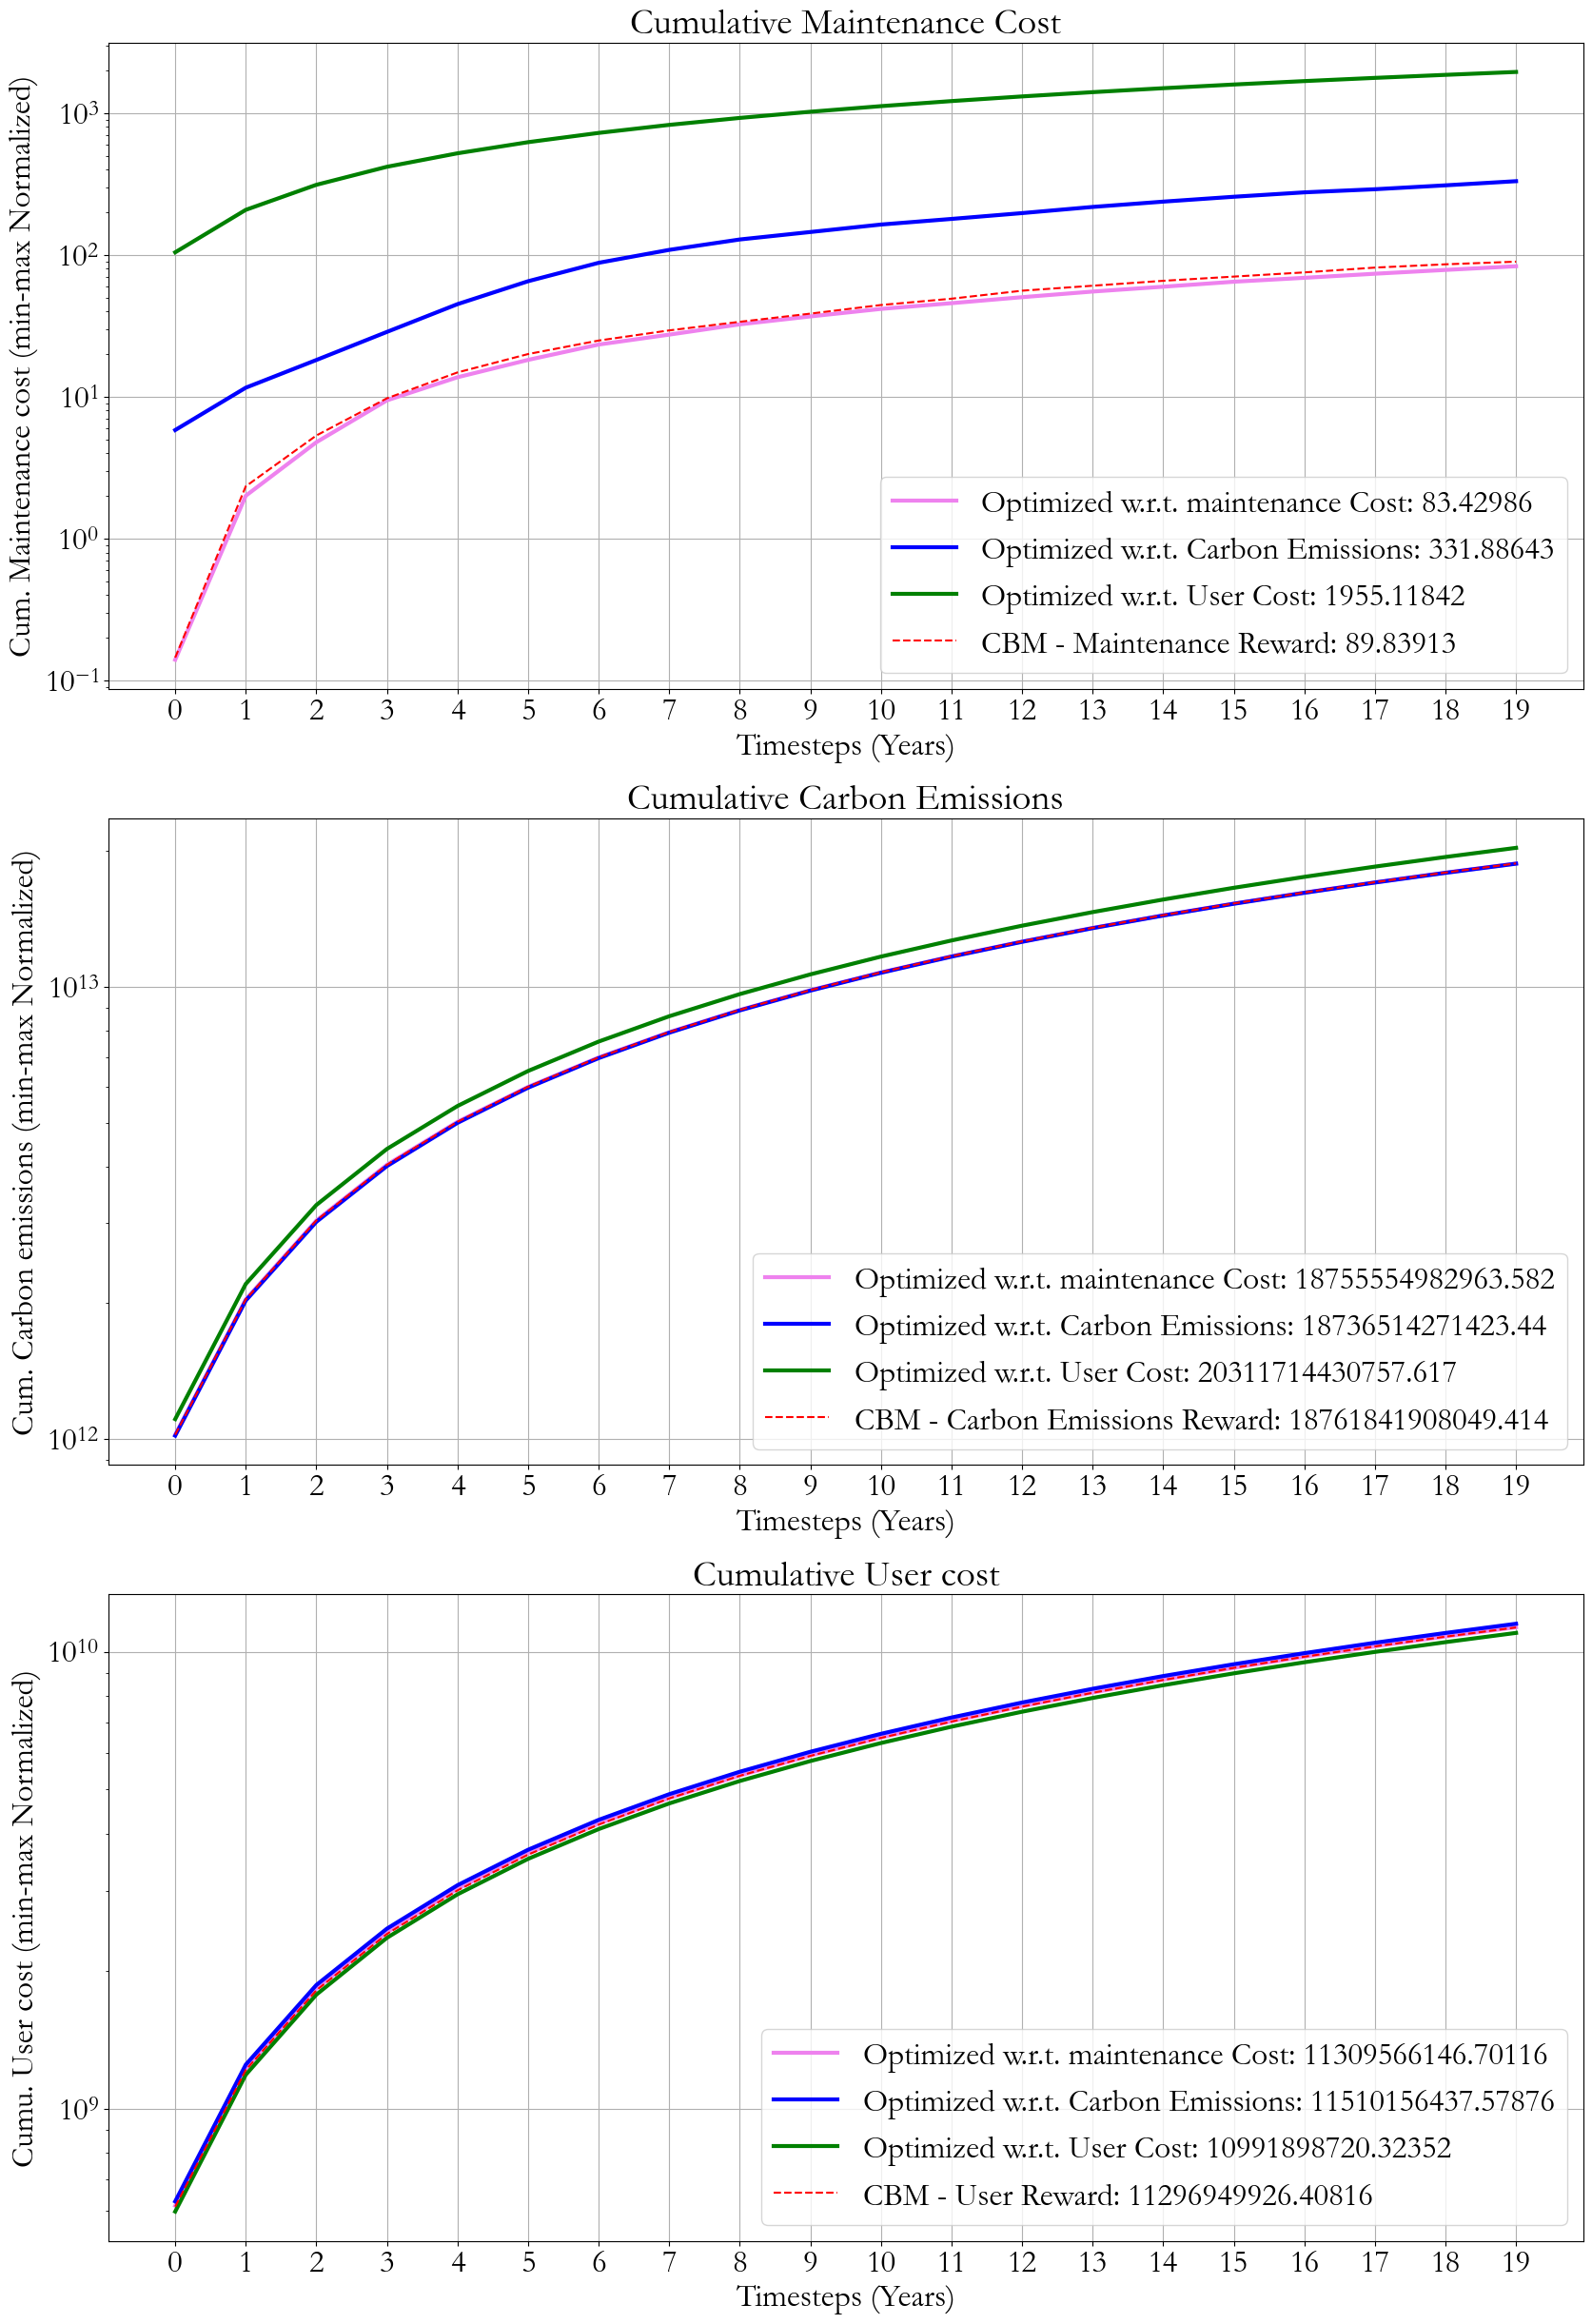

In [88]:
mult = 2
plt.rcParams["figure.figsize"] = (10*mult,15*mult)
plt.rcParams["font.family"] = "garamond"
def plot_cum_rewards(rewards_cum, obj, ax, col, label):
#     import ipdb; ipdb.set_trace()
#     for test in range(rewards_cum.shape[obj]):
#         ax.plot(rewards_cum[test, :, obj]/regs[obj], alpha=0.05, color=col)
    ax.set_xticks(np.arange(20))
#     import pdb; pdb.set_trace()
    
    if real > -1:
        line = rewards_cum[real, :, obj]
    else: # go with the mean
        line = np.mean(rewards_cum[:, :, obj], axis=0)
    ax.plot(line, alpha=1, color=col, linewidth=3, label=f"{label}: {np.around(line[-1]/norm_label[obj], 5)}")
#     plt.show()
    
def plot_objectives(rewards, ax, col="blue", label="Cost", obj=0):
#     rewards_test_cum = np.cumsum(rewards, axis=1)
    gamma = 0.99
    discounted_cumulative_sum = np.zeros_like(rewards)
    running_sum = np.zeros((100, 3))
#     for i in reversed(range(rewards.shape[1])):
    for i in range(rewards.shape[1]):
        running_sum = running_sum * gamma + rewards[:, i]
        discounted_cumulative_sum[:, i] = running_sum

    rewards_test_cum = discounted_cumulative_sum #[:, ::-1, :]
#     import pdb; pdb.set_trace()

#     import pdb; pdb.set_trace()

#     plot_cum_rewards(rewards_test_cum, obj, ax[obj], col, label=label)    
    plot_cum_rewards(rewards_test_cum, 0, ax[0], col, label=label)
    plot_cum_rewards(rewards_test_cum, 1, ax[1], col, label=label)
    plot_cum_rewards(rewards_test_cum, 2, ax[2], col, label=label)
    
fig, ax = plt.subplots(3)

plot_objectives(rew_cost, ax, col="violet", label="Optimized w.r.t. maintenance Cost", obj=0)
plot_objectives(rew_carbon, ax, col="blue", label="Optimized w.r.t. Carbon Emissions", obj=1)
plot_objectives(rew_user, ax, col="green", label="Optimized w.r.t. User Cost", obj=2)
# plot_objectives(rew_cost_cbm, ax, col="orange", label="Optimized for CBM - maintenance Cost")

# plt.show()

for i in range(3):
    ax[i].tick_params(axis='x', labelsize=12*mult)
    ax[i].tick_params(axis='y', labelsize=12*mult)

# Formatting
ax[0].set_title("Cumulative Maintenance Cost", size=14*mult)
ax[1].set_title("Cumulative Carbon Emissions", size=14*mult)
ax[2].set_title("Cumulative User cost", size=14*mult)

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

# Plot CBM as benchmarks
if real > -1:
    ax[0].plot(discounted_sum(rew_cost_cbm)[real,:,0], color="red", linestyle="--", label=f"CBM - Maintenance Reward: {np.around(discounted_sum(rew_cost_cbm)[real,-1,0]/norm_label[0], 5)}")
    ax[1].plot(discounted_sum(rew_carbon_cbm)[real,:,1], color="red", linestyle="--", label=f"CBM - Carbon Emissions Reward: {np.around(discounted_sum(rew_carbon_cbm)[real,-1,1]/norm_label[1], 5)}")
    ax[2].plot(discounted_sum(rew_user_cbm)[real,:,2], color="red", linestyle="--", label=f"CBM - User Reward: {np.around(discounted_sum(rew_user_cbm)[real,-1,2]/norm_label[2], 5)}")
else: # go with the mean
    ax[0].plot(np.mean(discounted_sum(rew_cost_cbm), axis=0)[:,0], color="red", linestyle="--", label=f"CBM - Maintenance Reward: {np.around(np.mean(discounted_sum(rew_cost_cbm), axis=0)[-1,0]/norm_label[0], 5)}")
    ax[1].plot(np.mean(discounted_sum(rew_carbon_cbm), axis=0)[:,1], color="red", linestyle="--", label=f"CBM - Carbon Emissions Reward: {np.around(np.mean(discounted_sum(rew_carbon_cbm), axis=0)[-1,1]/norm_label[1], 5)}")
    ax[2].plot(np.mean(discounted_sum(rew_user_cbm), axis=0)[:,2], color="red", linestyle="--", label=f"CBM - User Reward: {np.around(np.mean(discounted_sum(rew_user_cbm), axis=0)[-1,2]/norm_label[2], 5)}")

# ax[0].axhline(benchmarks[0]/regs[0], color="red", linestyle="--", label=f"CBM benchmark: {np.around(benchmarks[0]/regs[0], 2)}")
# ax[1].axhline(benchmarks[1]/regs[1], color="red", linestyle="--", label=f"CBM benchmark: {np.around(benchmarks[1]/regs[1], 2)}")
# ax[2].axhline(benchmarks[2]/regs[2], color="red", linestyle="--", label=f"CBM benchmark: {np.around(benchmarks[2]/regs[2], 2)}")

ax[0].legend(prop={'size': 12*mult})
ax[1].legend(prop={'size': 12*mult})
ax[2].legend(prop={'size': 12*mult})
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xlabel("Timesteps (Years)", size=12*mult)
ax[1].set_xlabel("Timesteps (Years)", size=12*mult)
ax[2].set_xlabel("Timesteps (Years)", size=12*mult)

ax[0].set_ylabel("Cum. Maintenance cost (min-max Normalized)", size=12*mult)
ax[1].set_ylabel("Cum. Carbon emissions (min-max Normalized)", size=12*mult)
ax[2].set_ylabel("Cumu. User cost (min-max Normalized)", size=12*mult);


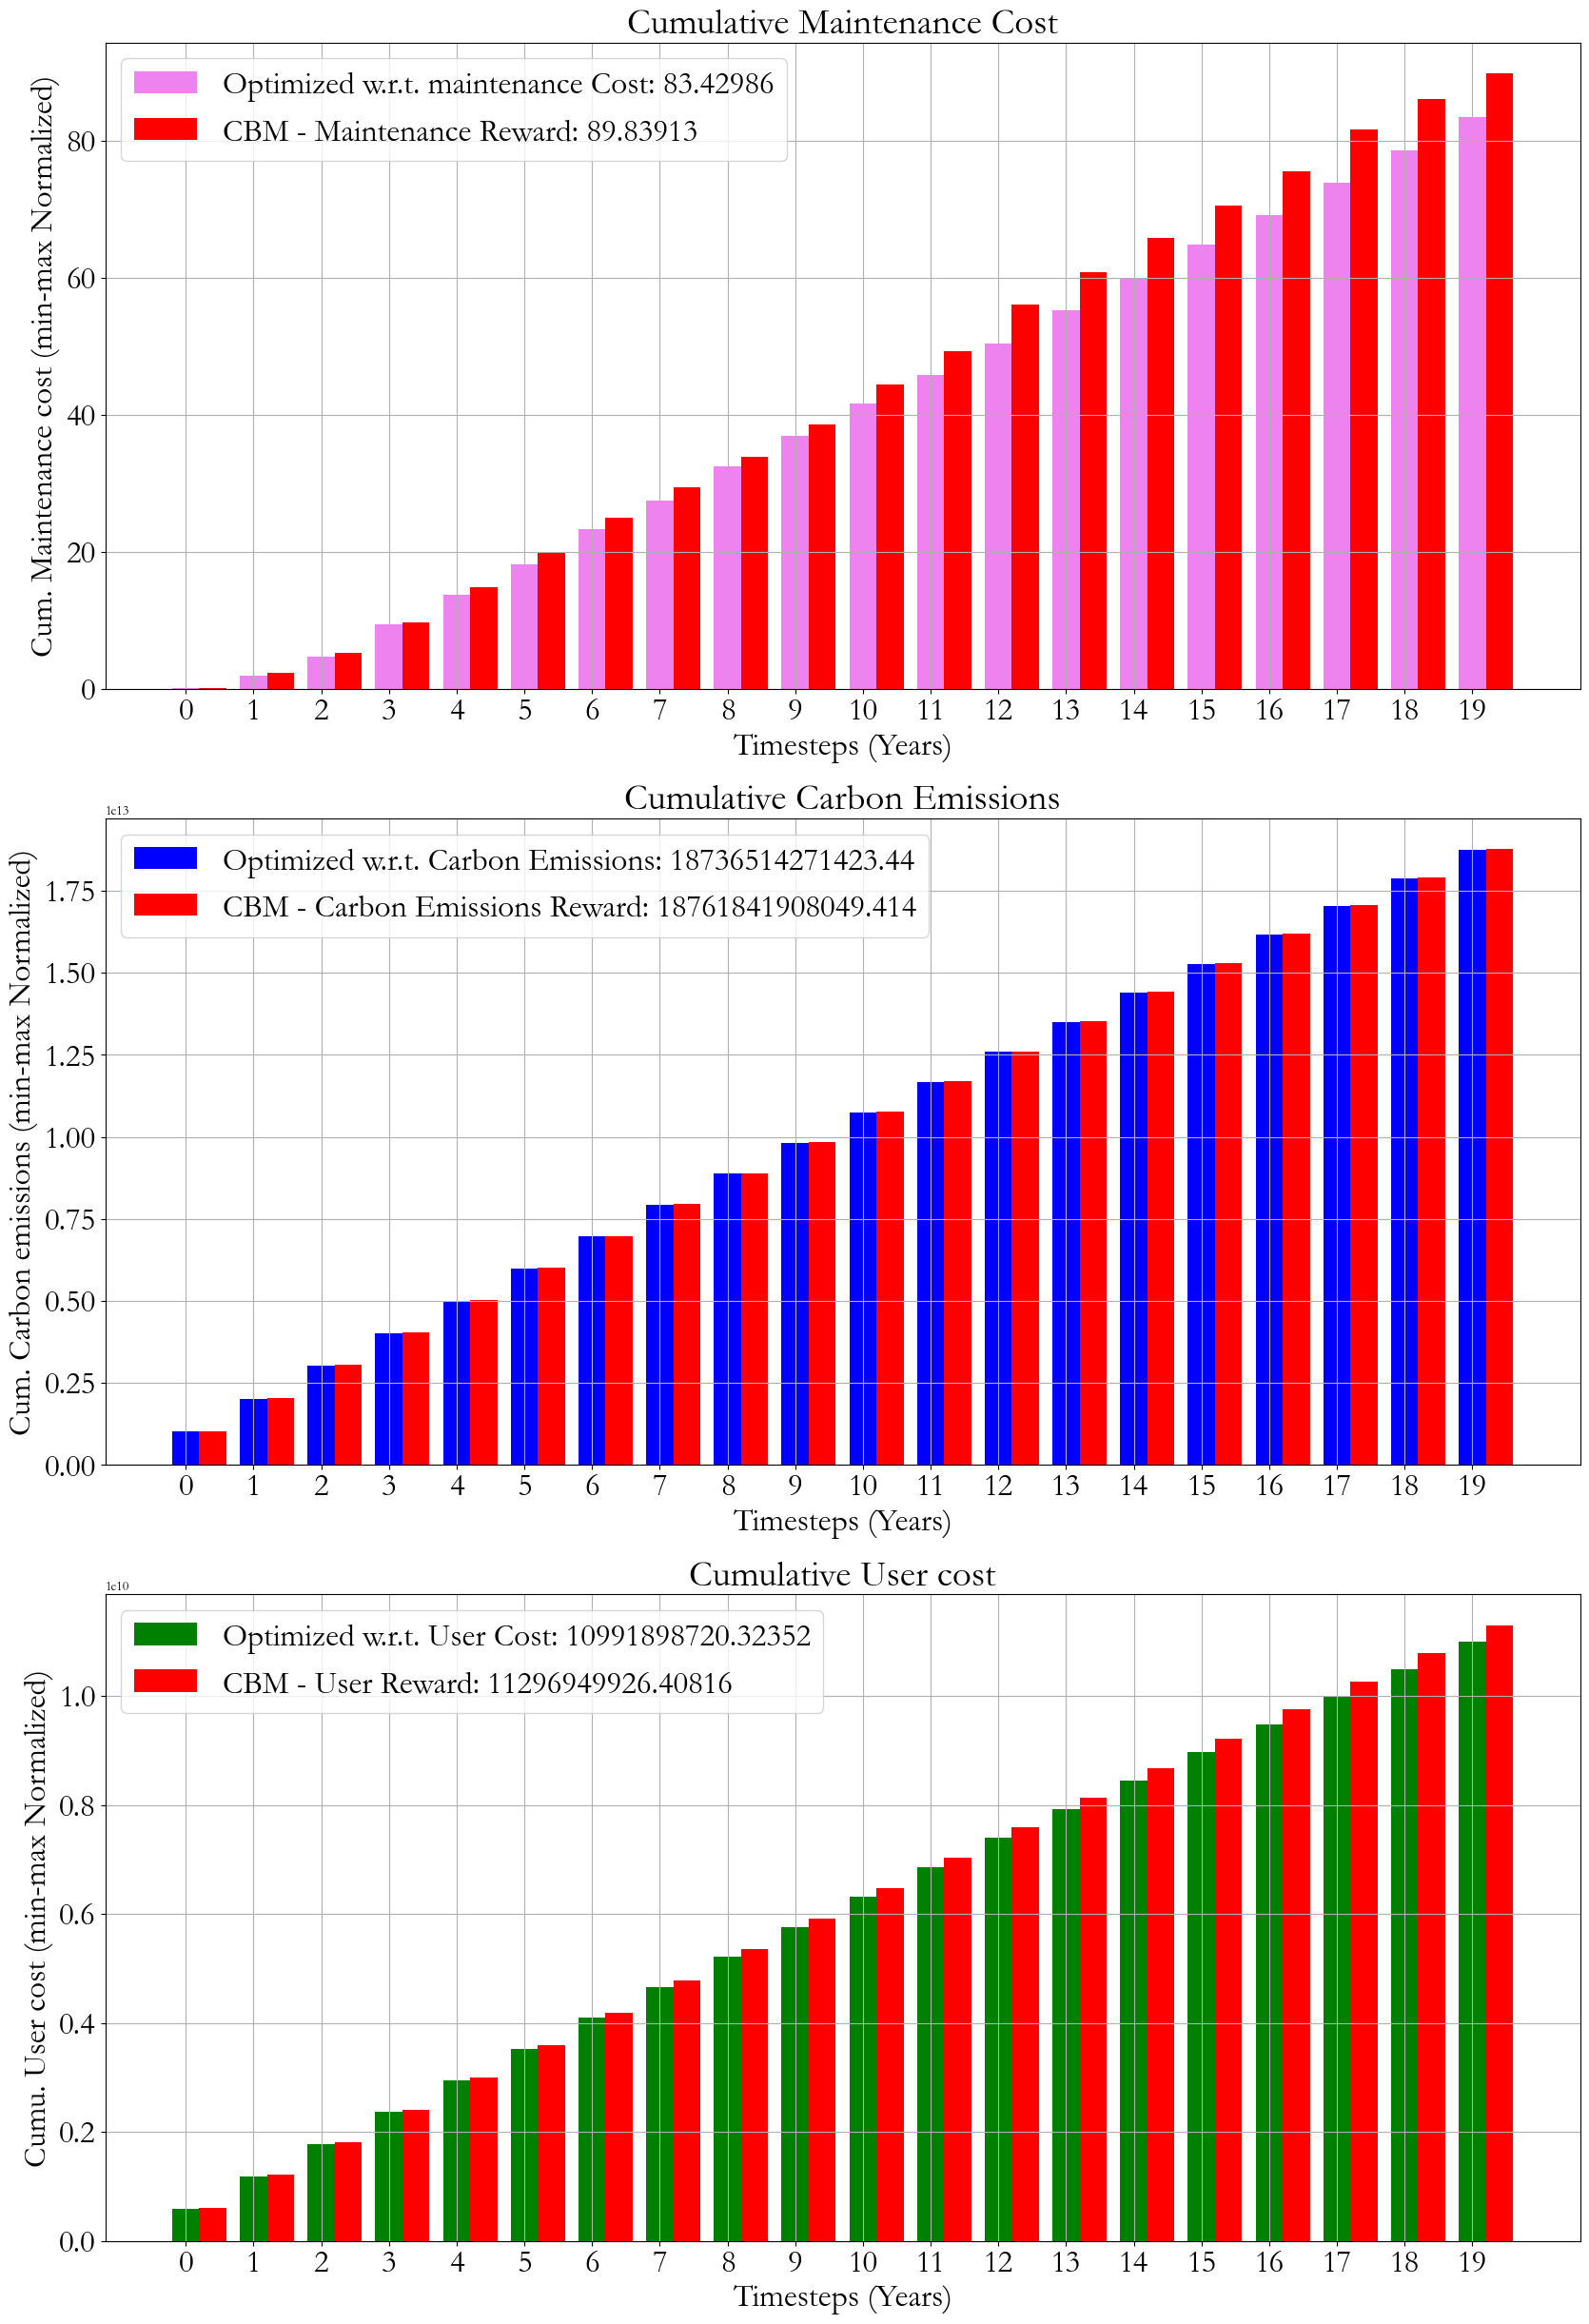

In [89]:
### Bar plot!!!

mult = 2
plt.rcParams["figure.figsize"] = (10*mult,15*mult)
plt.rcParams["font.family"] = "garamond"
def plot_cum_rewards(rewards_cum, obj, ax, col, label):
#     import ipdb; ipdb.set_trace()
#     for test in range(rewards_cum.shape[obj]):
#         ax.plot(rewards_cum[test, :, obj]/regs[obj], alpha=0.05, color=col)
    ax.set_xticks(np.arange(20))
#     import pdb; pdb.set_trace()
    
    if real > -1:
        line = rewards_cum[real, :, obj]
    else: # go with the mean
        line = np.mean(rewards_cum[:, :, obj], axis=0)
    ax.bar(range(20), line, width=0.4, alpha=1, color=col, linewidth=3, label=f"{label}: {np.around(line[-1]/norm_label[obj], 5)}")
#     plt.show()
    
def plot_objectives(rewards, ax, col="blue", label="Cost", obj=0):
#     rewards_test_cum = np.cumsum(rewards, axis=1)
    gamma = 0.99
    discounted_cumulative_sum = np.zeros_like(rewards)
    running_sum = np.zeros((100, 3))
#     for i in reversed(range(rewards.shape[1])):
    for i in range(rewards.shape[1]):
        running_sum = running_sum * gamma + rewards[:, i]
        discounted_cumulative_sum[:, i] = running_sum

    rewards_test_cum = discounted_cumulative_sum #[:, ::-1, :]
#     import pdb; pdb.set_trace()

#     import pdb; pdb.set_trace()

    plot_cum_rewards(rewards_test_cum, obj, ax[obj], col, label=label)    
#     plot_cum_rewards(rewards_test_cum, 0, ax[0], col, label=label)
#     plot_cum_rewards(rewards_test_cum, 1, ax[1], col, label=label)
#     plot_cum_rewards(rewards_test_cum, 2, ax[2], col, label=label)
    
fig, ax = plt.subplots(3)

plot_objectives(rew_cost, ax, col="violet", label="Optimized w.r.t. maintenance Cost", obj=0)
plot_objectives(rew_carbon, ax, col="blue", label="Optimized w.r.t. Carbon Emissions", obj=1)
plot_objectives(rew_user, ax, col="green", label="Optimized w.r.t. User Cost", obj=2)
# plot_objectives(rew_cost_cbm, ax, col="orange", label="Optimized for CBM - maintenance Cost")

# plt.show()

for i in range(3):
    ax[i].tick_params(axis='x', labelsize=12*mult)
    ax[i].tick_params(axis='y', labelsize=12*mult)

# Formatting
ax[0].set_title("Cumulative Maintenance Cost", size=14*mult)
ax[1].set_title("Cumulative Carbon Emissions", size=14*mult)
ax[2].set_title("Cumulative User cost", size=14*mult)

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
# ax[2].set_yscale('log')

# Plot CBM as benchmarks
if real > -1:
    ax[0].bar(np.arange(20)+0.4, discounted_sum(rew_cost_cbm)[real,:,0], width=0.4, color="red", linestyle="--", label=f"CBM - Maintenance Reward: {np.around(discounted_sum(rew_cost_cbm)[real,-1,0]/norm_label[0], 5)}")
    ax[1].bar(np.arange(20)+0.4, discounted_sum(rew_carbon_cbm)[real,:,1], width=0.4, color="red", linestyle="--", label=f"CBM - Carbon Emissions Reward: {np.around(discounted_sum(rew_carbon_cbm)[real,-1,1]/norm_label[1], 5)}")
    ax[2].bar(np.arange(20)+0.4, discounted_sum(rew_user_cbm)[real,:,2], width=0.4, color="red", linestyle="--", label=f"CBM - User Reward: {np.around(discounted_sum(rew_user_cbm)[real,-1,2]/norm_label[2], 5)}")
else: # go with the mean
    ax[0].bar(np.arange(20)+0.4, np.mean(discounted_sum(rew_cost_cbm), axis=0)[:,0], width=0.4, color="red", linestyle="--", label=f"CBM - Maintenance Reward: {np.around(np.mean(discounted_sum(rew_cost_cbm), axis=0)[-1,0]/norm_label[0], 5)}")
    ax[1].bar(np.arange(20)+0.4, np.mean(discounted_sum(rew_carbon_cbm), axis=0)[:,1], width=0.4, color="red", linestyle="--", label=f"CBM - Carbon Emissions Reward: {np.around(np.mean(discounted_sum(rew_carbon_cbm), axis=0)[-1,1]/norm_label[1], 5)}")
    ax[2].bar(np.arange(20)+0.4, np.mean(discounted_sum(rew_user_cbm), axis=0)[:,2], width=0.4, color="red", linestyle="--", label=f"CBM - User Reward: {np.around(np.mean(discounted_sum(rew_user_cbm), axis=0)[-1,2]/norm_label[2], 5)}")

# ax[0].axhline(benchmarks[0]/regs[0], color="red", linestyle="--", label=f"CBM benchmark: {np.around(benchmarks[0]/regs[0], 2)}")
# ax[1].axhline(benchmarks[1]/regs[1], color="red", linestyle="--", label=f"CBM benchmark: {np.around(benchmarks[1]/regs[1], 2)}")
# ax[2].axhline(benchmarks[2]/regs[2], color="red", linestyle="--", label=f"CBM benchmark: {np.around(benchmarks[2]/regs[2], 2)}")

ax[0].legend(prop={'size': 12*mult})
ax[1].legend(prop={'size': 12*mult})
ax[2].legend(prop={'size': 12*mult})
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xlabel("Timesteps (Years)", size=12*mult)
ax[1].set_xlabel("Timesteps (Years)", size=12*mult)
ax[2].set_xlabel("Timesteps (Years)", size=12*mult)

ax[0].set_ylabel("Cum. Maintenance cost (min-max Normalized)", size=12*mult)
ax[1].set_ylabel("Cum. Carbon emissions (min-max Normalized)", size=12*mult)
ax[2].set_ylabel("Cumu. User cost (min-max Normalized)", size=12*mult);


['carbon_emissions\\20230401174326_940.csv', 'carbon_emissions\\seed1234_20230331154941_815.csv', 'carbon_emissions\\seed1234_20230413205048_815.csv', 'carbon_emissions\\seed1244_20230421131438_940.csv', 'carbon_emissions\\seed1254_20230402005101_016.csv']


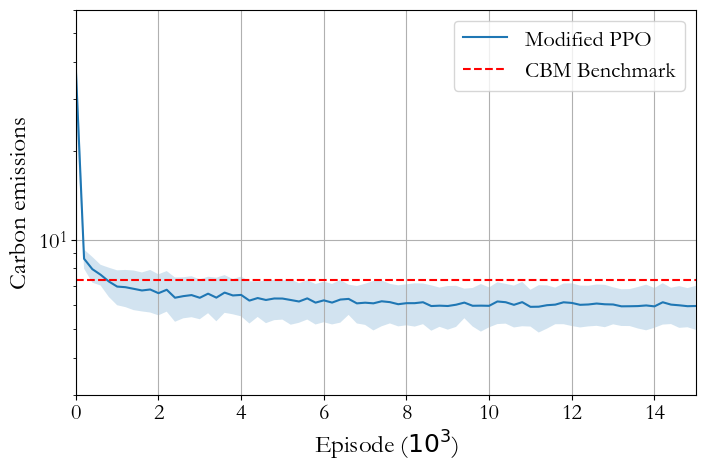

In [90]:
os.chdir("C:/Users/goust/Documents/EARLY_YEARS/Master/TU Delft/Thesis_project/TUD_thesis_project/jupyter_notebooks/single_objective_evaluation")
plt.rcParams["figure.figsize"] = (8,5)
# objective = "maintenance_cost"
objective = "carbon_emissions"
# objective = "user_cost"


y_labels = {"maintenance_cost": "Maintenance cost", "carbon_emissions": "Carbon emissions", "user_cost": "User cost"}
y_label = y_labels[objective]
benchmarks = {"maintenance_cost": 3.8089, "carbon_emissions": 7.3195, "user_cost": 25.467}
benchmark = benchmarks[objective]

files = []
for filename in os.listdir(objective+"/"):
    # construct the full path to the file
    filepath = os.path.join(objective, filename)
    # check if the file is a regular file (not a directory)
    if os.path.isfile(filepath):
        # add the file to the list of files
        files.append(filepath)
        
print(files)

import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    vals = [data["seed1"], data["seed2"], data["seed3"], data["seed4"], data["seed5"]] 
    a = 1.0 * np.array(vals)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h
    return h


df = pd.read_csv(files[0])
df = df.rename(columns={'Value': 'seed1'})

for idx, file in enumerate(files[1:]):
    
    df_temp = pd.read_csv(file)
    df[f"seed{idx+2}"] = df_temp['Value']
    
df["m"] = df[["seed1", "seed2", "seed3", "seed4", "seed5"]].mean(axis=1)


df["h"] = df.apply(mean_confidence_interval, axis=1)
df["m+h"] = df["m"] + df["h"]
df["m-h"] = df["m"] - df["h"]
df

fig, ax = plt.subplots()

ax.plot(df["Step"]/1000, -df["m"], label="Modified PPO")

# shade the area between the confidence intervals
ax.fill_between(df["Step"]/1000, -df["m-h"], -df["m+h"], alpha=0.2)

# add axis labels and title
ax.set_xlabel('Episode ($10^3$)', size=18)
ax.set_ylabel(y_label, size=18)
# ax.set_title('Five realizations with Confidence Intervals')

ax.set_yscale('log')

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(benchmark, c="red", linestyle="--", label="CBM Benchmark")

ax.grid()
# add legend
ax.legend(fontsize=16)
# ax.set_ylim(0, 40)
ax.axis([0, 15, 3, 60])
# ax.loglog()
plt.show()

In [91]:
# Get the returns for each execution
cost_ret = np.mean(discounted_sum(rew_cost), axis=0)[-1,:]
carbon_ret = np.mean(discounted_sum(rew_carbon), axis=0)[-1,:]
user_ret = np.mean(discounted_sum(rew_user), axis=0)[-1,:]
 
cost_ret_cbm = np.mean(discounted_sum(rew_cost_cbm), axis=0)[-1,:]
carbon_ret_cbm = np.mean(discounted_sum(rew_carbon_cbm), axis=0)[-1,:]
user_ret_cbm = np.mean(discounted_sum(rew_user_cbm), axis=0)[-1,:]

print(cost_ret)
print(carbon_ret)
print(user_ret)

print(cost_ret_cbm)
print(carbon_ret_cbm)
print(user_ret_cbm)

[8.34298592e+01 1.87555550e+13 1.13095661e+10]
[3.31886431e+02 1.87365143e+13 1.15101564e+10]
[1.95511842e+03 2.03117144e+13 1.09918987e+10]
[8.98391309e+01 1.87622286e+13 1.13176555e+10]
[8.79558234e+01 1.87618419e+13 1.13175019e+10]
[2.91153842e+02 1.87722711e+13 1.12969499e+10]


# Actions of extreme executions

In [92]:
os.chdir('C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\results\\greenlight\\ols_no_reuse\\outputs\\seed1244')
os.getcwd()

execution_to_show = 7
replace_dict = {0: 0, 2: 1, 6: 2, 8: 3, 9: 4}

actions_co = np.vectorize(replace_dict.get)(actions_cost)[execution_to_show]
actions_ca = np.vectorize(replace_dict.get)(actions_carbon)[execution_to_show]
actions_ti = np.vectorize(replace_dict.get)(actions_user)[execution_to_show]

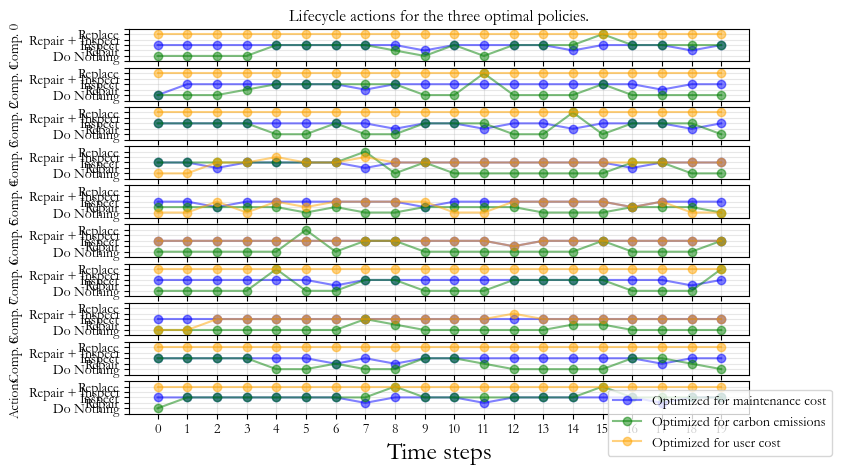

In [93]:
class visualizeResults:
    def __init__(self, actions, ax=None, colId=0, label="Cost"):
        
        self.label = label
        self.colId = colId
        self.actions = actions
        self.timestep = self.actions.shape[0] - 1
        self.colors = ["blue", "green", "orange", "brown", "grey", "cyan", "red", "navy"]
#         self.my_yticks = ['', 'Do Nothing','Repair','Replace','Inspect', 'Repair + Inspect', 'Replace + Inspect', '']
        self.my_yticks = ['', 'Do Nothing','Repair', 'Inspect', 'Repair + Inspect', "Replace", '']
        
        self.n_comps = self.actions.shape[1]
        self.ax = ax
        
    def plot_component_actions(self, ax, comp):
        col = self.colors[self.colId]
#         label = f"Component {comp}"
        actions = self.actions[:,comp]
        
        ax[comp].plot(np.arange(len(actions)), actions, marker='o', linestyle='-', color=col, label=self.label, alpha=0.5)
        
        ax[comp].set_yticks(np.arange(-1, len(self.my_yticks) - 1))
        ax[comp].set_xticks(np.arange(20))
        ax[comp].set_yticklabels(self.my_yticks)
        plt.xlabel("Time steps", size=18)
        ax[comp].set_ylabel(f"Comp. {comp}")
        ax[comp].grid(alpha=0.3)
#         ax[comp].legend()
    
    def plot_costs(self):
        pass
    
    def plot_actions(self, save=False):
        
        if not np.all(self.ax):
            fig, ax = plt.subplots(nrows=self.n_comps, ncols=1)
        else:
            ax = self.ax

        ax[0].set_title(f"Lifecycle actions for the three optimal policies.")
        for comp in range(self.n_comps):
            self.plot_component_actions(ax, comp)

        self.plot_costs()
        
        
        if save: 
            upload_to_html(fig, filename)
    
fig, ax = plt.subplots(10, sharex=True)
visualizeResults(actions_co, ax, colId=0, label="Optimized for maintenance cost").plot_actions()
visualizeResults(actions_ca, ax, colId=1, label="Optimized for carbon emissions").plot_actions()
visualizeResults(actions_ti, ax, colId=2, label="Optimized for user cost").plot_actions()
plt.ylabel("Actions")
plt.legend(bbox_to_anchor=(0.76, -1.5), loc='lower left')
plt.show()

# Cost Compoments plots!

In [114]:
def plot_cost_components(cost_comps, xlabel, title, ax):

    total_list = []
    for key in cost_comps.keys():
        my_dict = {}
        for d in cost_comps[key]:
            for k, v in d.items():
                my_dict.setdefault(k, []).append(v)

        total_list.append(my_dict)

    total_list

    final_dict = {}
    for key in total_list[0].keys():
        final_dict[key] = np.zeros(len(total_list[0][key]))
        for dictt in total_list:
            final_dict[key] += np.array(dictt[key])
#             break
        final_dict[key] /= len(total_list)
    final_dict

    ax.set_xticks(np.arange(20))
    for key, value in final_dict.items():
        print(f"Key {key} last value: {value[-1]}")
        ax.plot(value, label=key)
        
        
    ax.legend(prop={'size': 14})
    ax.grid()
    ax.set_ylabel(xlabel, size=14)
    ax.set_xlabel("Timesteps", size=14)
#     ax.set_title(title, size=14)
    
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

In [115]:
cost_cost_comps.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'])

In [116]:

for comp in cost_cost_comps["0"][0].keys():
    avg = 0
    for k in cost_cost_comps.keys():
        avg += cost_cost_comps[k][-1][comp]
    print(f"For comp {comp}: {avg/len(cost_cost_comps.keys())}")

For comp maintenance: -1814.9939065023948
For comp inspection: -0.8701633631369553
For comp mobilization: -131.50651656546137
For comp urgent_actions: -6.949486403648616
For comp total: -1954.3200728346426


In [97]:
points = -np.array(
[
    [81.35, 195526, 11306],
    [322.94, 173172, 11508],
    [1954.32, 1753819, 10990],
    [461.42, 292918, 11401]
])

In [98]:
from utils_analysis import plot_interactive, hypervolume, sparsity
plot_interactive(points, labels=["Maintenance cost", "Carbon emissions", "User cost"])

Key maintenance last value: -42.95997108487367
Key inspection last value: 0.0
Key mobilization last value: -65.2344963396057
Key urgent_actions last value: -353.2302959288113
Key total last value: -461.42476335329053
Key rerouting last value: -173493575532.17978
Key condition last value: -99208268697.64964
Key actions last value: -21564396061.866657
Key total last value: -292917901738.5969
Key user_cost last value: -11401675202.731768


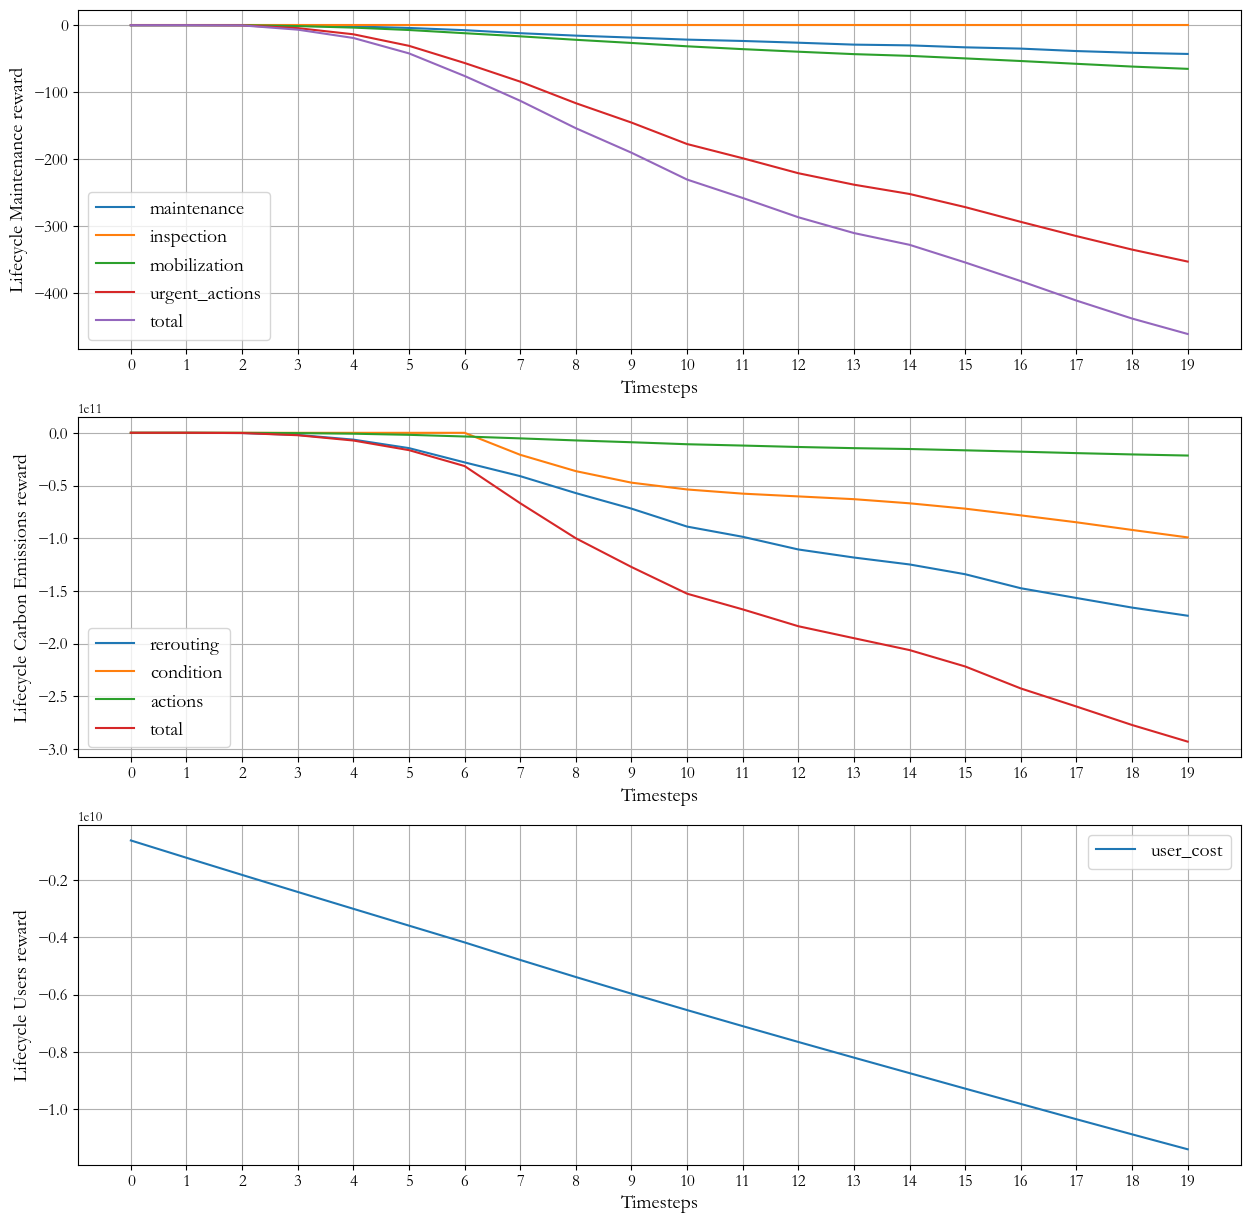

In [117]:
labels=["Lifecycle maintenance reward", "Lifecycle carbon emissions reward", "Lifecycle user reward"]


# Optimizing for MAINTENANCE COST
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(3)

cost_cost_comps = json.load(open("greenlight_ppo_even_cost_comp.json", "r"))
cost_carbon_comps = json.load(open("greenlight_ppo_even_carbon_comp.json", "r"))
cost_user_comps = json.load(open("greenlight_ppo_even_user_comp.json", "r"))

plot_cost_components(cost_cost_comps, "Lifecycle Maintenance reward", "Maintenance cost components, with even preferences.", ax[0])
plot_cost_components(cost_carbon_comps, "Lifecycle Carbon Emissions reward", "Carbon Emissions components, with even preferences.", ax[1])
plot_cost_components(cost_user_comps, "Lifecycle Users reward", "User cost components, with even preferences.", ax[2])
plt.show()



Key maintenance last value: -56.82499686332365
Key inspection last value: -2.3067558999762823
Key mobilization last value: -16.638890253216097
Key urgent_actions last value: -5.579926675348762
Key total last value: -81.35056969186483
Key rerouting last value: -87771969652.36499
Key condition last value: -102060369043.66078
Key actions last value: -6361188925.281744
Key total last value: -195526093567.9136
Key user_cost last value: -11306095598.572681


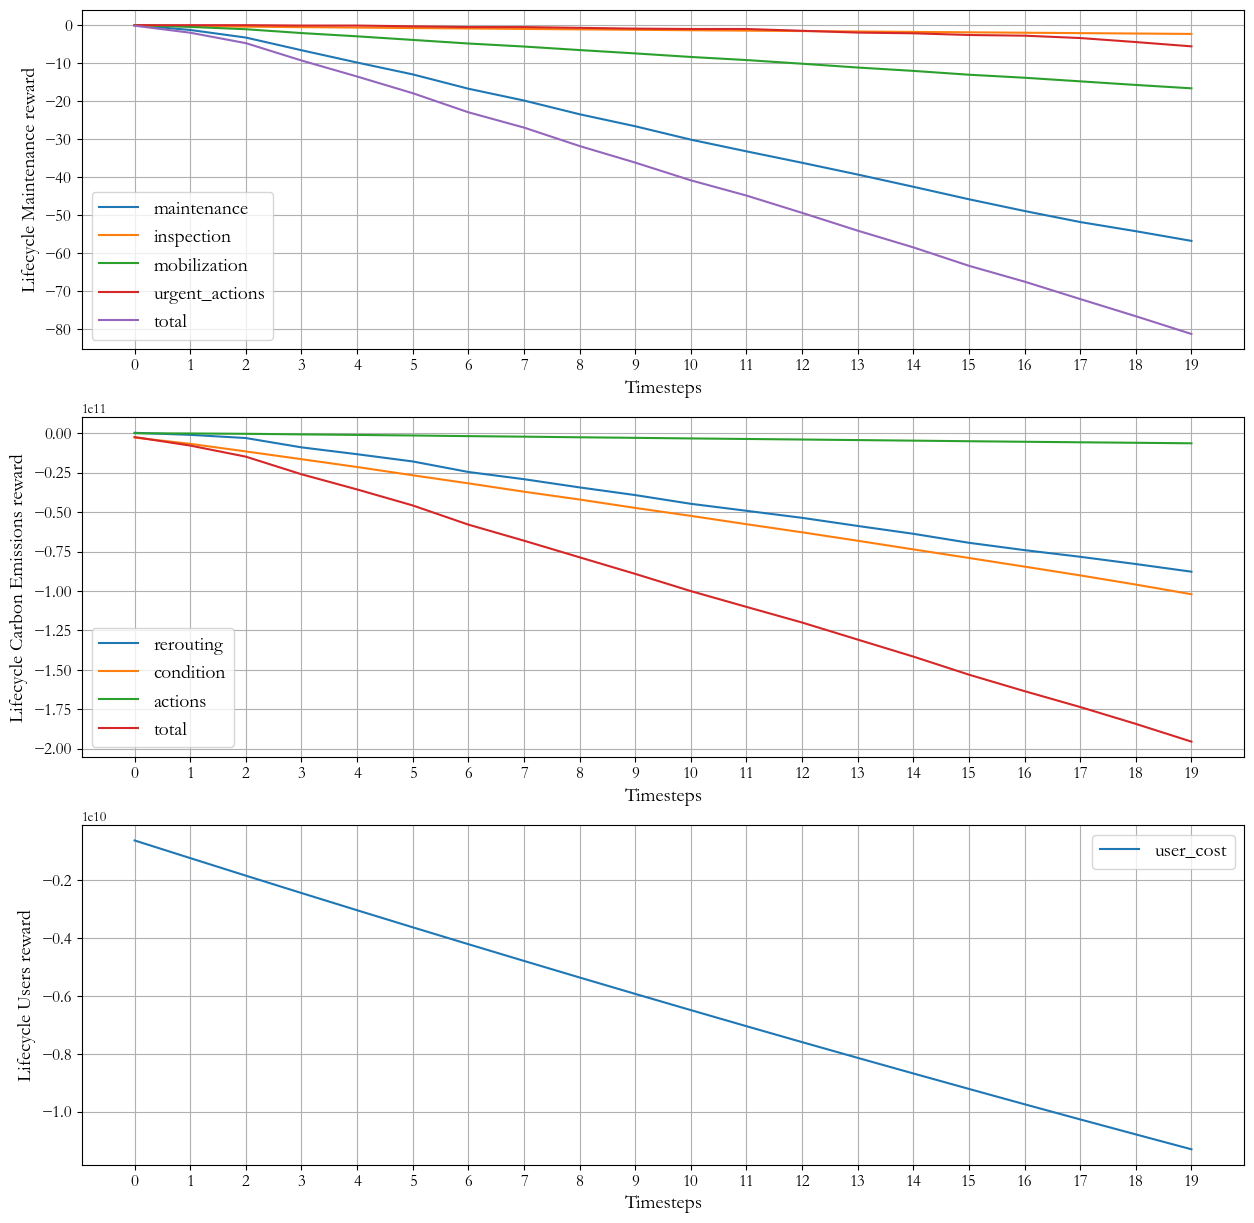

In [118]:
# Optimizing for MAINTENANCE COST
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(3)

cost_cost_comps = json.load(open("greenlight_exp_cost_cost_comp.json", "r"))
cost_carbon_comps = json.load(open("greenlight_exp_cost_carbon_comp.json", "r"))
cost_user_comps = json.load(open("greenlight_exp_cost_user_comp.json", "r"))

plot_cost_components(cost_cost_comps, "Lifecycle Maintenance reward", "Maintenance cost components, when optimizing for maintenance cost", ax[0])
plot_cost_components(cost_carbon_comps, "Lifecycle Carbon Emissions reward", "Carbon Emissions components, when optimizing for maintenance cost", ax[1])
plot_cost_components(cost_user_comps, "Lifecycle Users reward", "User cost components, when optimizing for maintenance cost", ax[2])
plt.show()

Key maintenance last value: -87.6440618499005
Key inspection last value: -0.9437906664769017
Key mobilization last value: -63.37824906886287
Key urgent_actions last value: -170.97390670743997
Key total last value: -322.94000829268015
Key rerouting last value: -65102860646.72299
Key condition last value: -91182310356.44096
Key actions last value: -17477975361.38375
Key total last value: -173172721555.18585
Key user_cost last value: -11508191111.798254


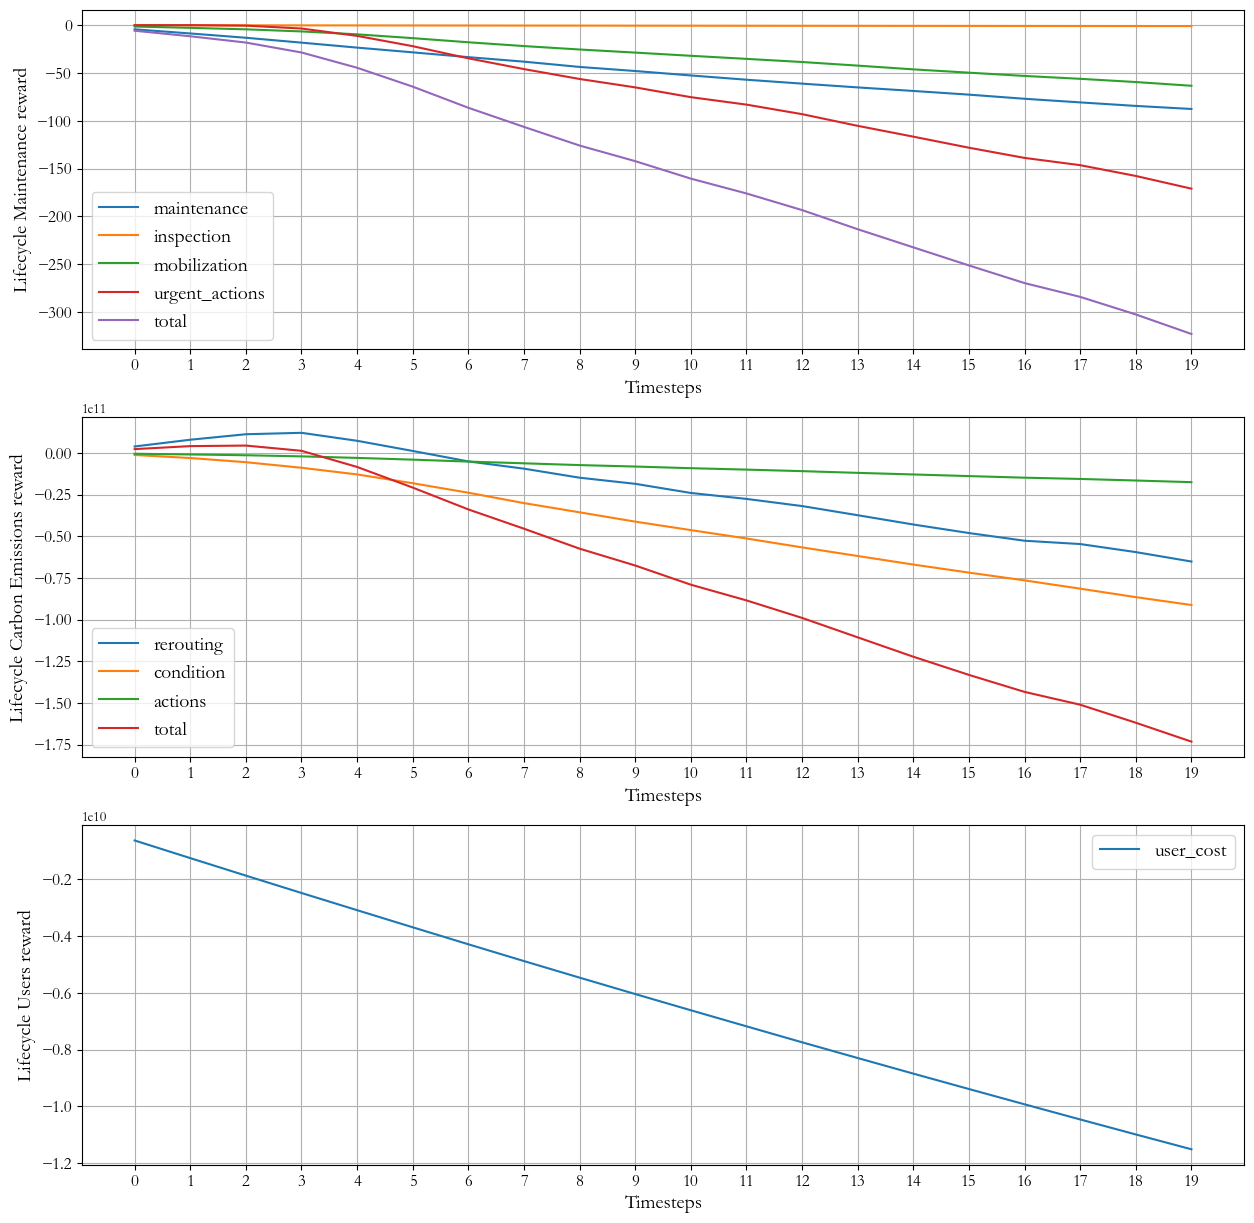

In [119]:
# Optimizing for CARBON EMISSION
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(3)

cost_cost_comps = json.load(open("greenlight_exp_carbon_cost_comp.json", "r"))
cost_carbon_comps = json.load(open("greenlight_exp_carbon_carbon_comp.json", "r"))
cost_user_comps = json.load(open("greenlight_exp_carbon_user_comp.json", "r"))

plot_cost_components(cost_cost_comps, "Lifecycle Maintenance reward", "Maintenance cost components, when optimizing for carbon emissions", ax[0])
plot_cost_components(cost_carbon_comps, "Lifecycle Carbon Emissions reward", "Carbon Emissions components, when optimizing for carbon emissions", ax[1])
plot_cost_components(cost_user_comps, "Lifecycle Users reward", "User cost components, when optimizing for carbon emissions", ax[2])

plt.show()



Key maintenance last value: -1814.9939065023948
Key inspection last value: -0.8701633631369553
Key mobilization last value: -131.50651656546137
Key urgent_actions last value: -6.949486403648616
Key total last value: -1954.3200728346426
Key rerouting last value: -1568249933434.1843
Key condition last value: -45922851232.13327
Key actions last value: -139813644100.11353
Key total last value: -1753819565636.0176
Key user_cost last value: -10989572605.049784


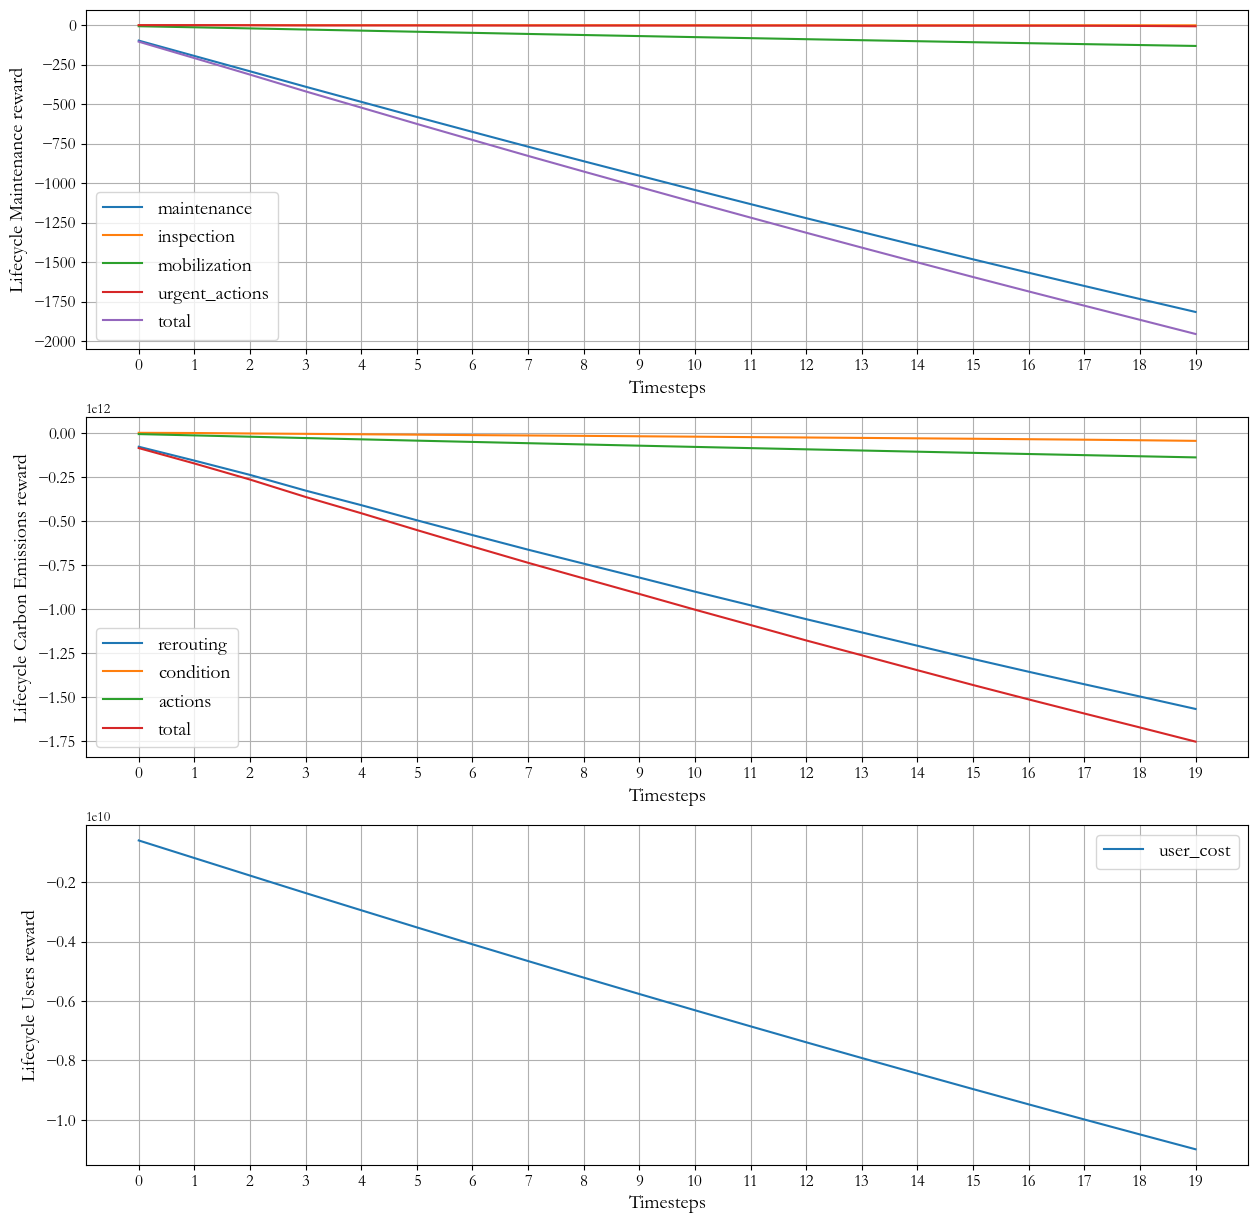

In [120]:
# Optimizing for USER COST
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(3)

cost_cost_comps = json.load(open("greenlight_exp_user_cost_comp.json", "r"))
cost_carbon_comps = json.load(open("greenlight_exp_user_carbon_comp.json", "r"))
cost_user_comps = json.load(open("greenlight_exp_user_user_comp.json", "r"))

plot_cost_components(cost_cost_comps, "Lifecycle Maintenance reward", "Maintenance cost components, when optimizing for maintenance cost", ax[0])
plot_cost_components(cost_carbon_comps, "Lifecycle Carbon Emissions reward", "Carbon Emissions components, when optimizing for maintenance cost", ax[1])
plot_cost_components(cost_user_comps, "Lifecycle Users reward", "User cost components, when optimizing for maintenance cost", ax[2])
plt.show()

In [36]:
# Timing
os.chdir("C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\TUD_thesis_project\\jupyter_notebooks")

In [37]:
xx = np.loadtxt("timing_thesis.csv", delimiter=",")

0.014001607894897461 0.09245967864990234


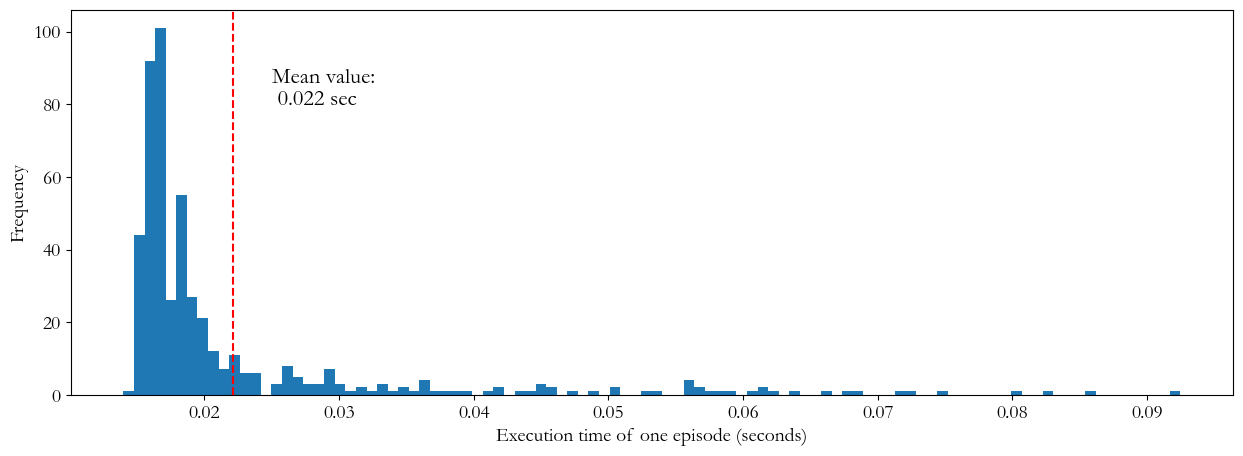

In [38]:
plt.rcParams["figure.figsize"] = (15,5)
vals = xx[:500,1]
print(min(vals), max(vals))
plt.hist(vals, bins=100);
plt.axvline(np.mean(vals), linestyle="--", color="red")
plt.text(0.025, 80, f"Mean value: \n {np.mean(vals):.3f} sec" , size=16, font="garamond")



# plt.ytick(labelsize=12)
plt.tick_params(labelsize=14)
plt.xlabel("Execution time of one episode (seconds)", size=14)
plt.ylabel("Frequency", size=14)

plt.show()

In [39]:
# final_json = json.load(open(result_files[29]))
# final_json
ccs = final_json["ccs"]
weights = final_json["W"]

ccs_arr = np.stack(ccs)
weights_arr = np.stack(weights)

In [40]:
for idx, w in enumerate(weights_arr):
    if np.all(w > 0.3):
        print(w)
        print(idx)

In [41]:
len(weights_arr)

66

In [42]:
final_json

{'m': 3,
 'W': [[0.0, 0.0, 1.0],
  [0.0, 0.1, 0.9],
  [0.0, 0.2, 0.8],
  [0.0, 0.3, 0.7],
  [0.0, 0.4, 0.6],
  [0.0, 0.5, 0.5],
  [0.0, 0.6, 0.4],
  [0.0, 0.7, 0.3],
  [0.0, 0.8, 0.2],
  [0.0, 0.9, 0.1],
  [0.0, 1.0, 0.0],
  [0.1, 0.0, 0.9],
  [0.1, 0.1, 0.8],
  [0.1, 0.2, 0.7],
  [0.1, 0.3, 0.6],
  [0.1, 0.4, 0.5],
  [0.1, 0.5, 0.4],
  [0.1, 0.6, 0.3],
  [0.1, 0.7, 0.2],
  [0.1, 0.8, 0.1],
  [0.1, 0.9, 0.0],
  [0.2, 0.0, 0.8],
  [0.2, 0.1, 0.7],
  [0.2, 0.2, 0.6],
  [0.2, 0.3, 0.5],
  [0.2, 0.4, 0.4],
  [0.2, 0.5, 0.3],
  [0.2, 0.6, 0.2],
  [0.2, 0.7, 0.1],
  [0.2, 0.8, 0.0],
  [0.3, 0.0, 0.7],
  [0.3, 0.1, 0.6],
  [0.3, 0.2, 0.5],
  [0.3, 0.3, 0.4],
  [0.3, 0.4, 0.3],
  [0.3, 0.5, 0.2],
  [0.3, 0.6, 0.1],
  [0.3, 0.7, 0.0],
  [0.4, 0.0, 0.6],
  [0.4, 0.1, 0.5],
  [0.4, 0.2, 0.4],
  [0.4, 0.3, 0.3],
  [0.4, 0.4, 0.2],
  [0.4, 0.5, 0.1],
  [0.4, 0.6, 0.0],
  [0.5, 0.0, 0.5],
  [0.5, 0.1, 0.4],
  [0.5, 0.2, 0.3],
  [0.5, 0.3, 0.2],
  [0.5, 0.4, 0.1],
  [0.5, 0.5, 0.0],
  [0.6, 0.0, 0.4]

In [43]:

def is_dominated(ccs, weights):
    
    new_ccs = []
    new_weights = []
    for idx1, v in enumerate(ccs):
        flag = True
        for idx, value in enumerate(ccs):
#             import pdb; pdb.set_trace()
            if idx == idx1:
                pass
            elif (value[1:] >= v[1:]).all():
                flag = False
        if flag:
            new_ccs.append(v)
            new_weights.append(weights[idx1])
    return new_ccs, new_weights

new_ccs, new_weights = is_dominated(ccs_arr, weights_arr)

ccs_arr = np.stack(new_ccs)
weights_arr = np.stack(new_weights)

In [44]:
import plotly.express as px
obj = [1,2]
size=[500, 300]

labels = ["$V_1$", "$V_1$", "$V_2$"]

df = pd.DataFrame({labels[0]: ccs_arr[:, 0], labels[1]: ccs_arr[:, 1], labels[2]: ccs_arr[:, 2]})

if len(obj) == 3:
    fig = px.scatter_3d(df, x=labels[0], y=labels[1], z=labels[2], opacity=0.7)
else:
    fig = px.scatter(df, x=labels[obj[0]], y=labels[obj[1]], opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=size[0], height=size[1])
fig.show()

In [45]:
len(final_json["ccs"])
# len(final_json["W"])

3

In [46]:
ccs_arrs

NameError: name 'ccs_arrs' is not defined

In [47]:
np.reshape(np.repeat(ccs_arrs[0], 8), [8, -1])

NameError: name 'ccs_arrs' is not defined

In [48]:
xx1 = np.tile(ccs_arrs[0], [8, 1])

xx2 = np.tile(ccs_arrs[10], [8, 1])

xx3 = np.tile(ccs_arrs[22], [8, 1])

xx = np.concatenate((xx1, xx2, xx3), axis=0) * ((np.random.rand(24, 2)-0.5)/7 + 1)
# print(xx1)
# print(xx2)
# print(xx3)
xx


NameError: name 'ccs_arrs' is not defined

[0. 1.]
[0.1 0.9]
[0.2 0.8]


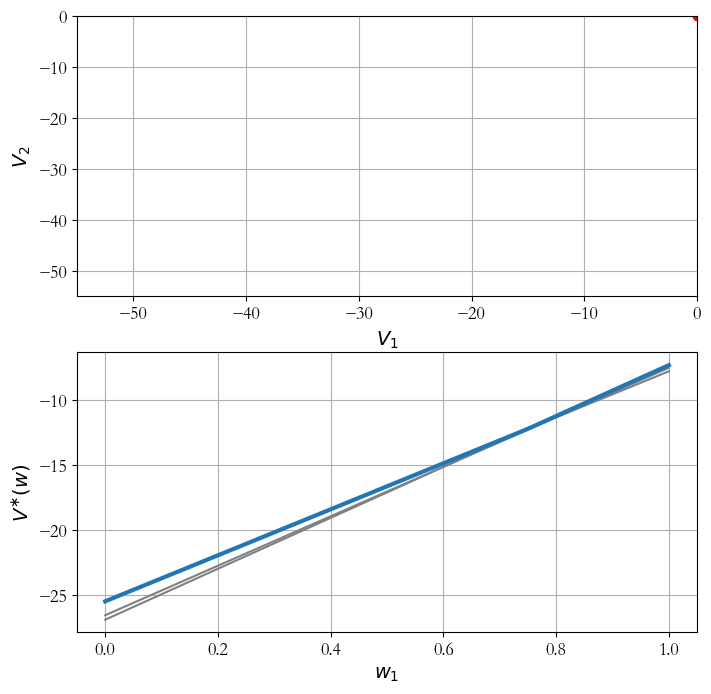

In [49]:
for ll in range(24,25):
    plt.rcParams["figure.figsize"] = (8,8)

    linspace = np.linspace(0, 10)/10
    linspaces = [linspace, 1- linspace]
    linspaces = np.stack(linspaces).T

    plt.rcParams["font.family"] = 'serif'
    plt.rcParams["font.serif"] = ["Garamond"]

    fig, ax = plt.subplots(2, 1)

    arrs = []
    ccs_arrs = []
    for idx, value in enumerate(ccs_arr[:ll]):

    #     if np.random.rand(1) < 0.95:
    #         continue
    #     if weights_arr[idx][0] > 0.01:
    #         continue

        arr = linspaces @ ccs_arr[idx, 1:]

        ax[1].plot(linspace, arr, label = np.around(weights_arr[idx, 1:], 2), color="grey")
        print(np.around(weights_arr[idx, 1:], 2))
        arrs.append(arr)
        ccs_arrs.append(ccs_arr[idx, 1:])

    # plt.legend()

    arrs_max = np.max(np.stack(arrs), axis=0)
    ax[1].plot(linspace, arrs_max, linewidth=3)

    # ax[1].fill_between(linspace, arrs_max, -5, where=arrs_max<0, interpolate=True, color="blue", alpha=0.3)


    ax[1].tick_params(axis='both', which='major', labelsize=13)
    ax[1].set_xlabel(r"$w_1$", size=14)
    ax[1].set_ylabel(r"$V^{\ast}(w)$", size=14)

    ax[0].scatter(xx[:,0],xx[:,1], color="red")
#     ax[0].scatter(np.stack(ccs_arrs)[:,0]*(1-np.random.rand(24)/3), np.stack(ccs_arrs)[:,1]*(1-np.random.rand(24)/3))
#     ax[0].scatter(np.stack(ccs_arrs)[:,0], np.stack(ccs_arrs)[:,1], color="red")
    ax[0].set_ylim(-55, 0)
    ax[0].set_xlim(-55, 0)
    ax[0].tick_params(axis='both', which='major', labelsize=13)
    ax[0].set_xlabel(r"$V_1$", size=14)
    ax[0].set_ylabel(r"$V_2$", size=14)

    ax[0].grid()
    ax[1].grid()
#     ax[1].legend()
    plt.show()

In [50]:
weights_arr

array([[0. , 0. , 1. ],
       [0. , 0.1, 0.9],
       [0. , 0.2, 0.8]])

In [51]:
ccs_arr.shape

(3, 3)

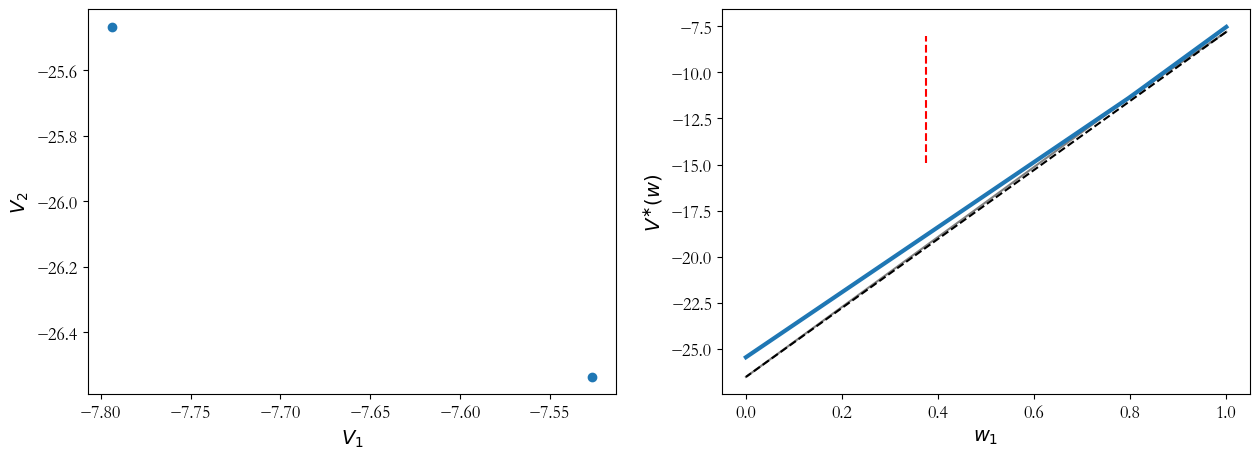

In [52]:
plt.rcParams["figure.figsize"] = (15,5)

linspace = np.linspace(0, 10)/10
linspaces = [linspace, 1- linspace]
linspaces = np.stack(linspaces).T

plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.serif"] = ["Garamond"]

fig, ax = plt.subplots(1, 2)

ax[0].scatter

arrs = []
ccs_arrs = []
for idx, value in enumerate(ccs_arr):

    if (idx == 0) or (idx == 1):
        pass
    else:
        continue
    arr = linspaces @ ccs_arr[idx, 1:]
    
    ax[1].plot(linspace, arr, label = weights_arr[idx], color="grey")
    arrs.append(arr)
    ccs_arrs.append(ccs_arr[idx, 1:])
    
# plt.legend()

arrs_max = np.max(np.stack(arrs), axis=0)
ax[1].plot(linspace, arrs_max, linewidth=3)

ax[1].plot([1, 0], [ccs_arr[0, 1], ccs_arr[1, 2]], linestyle="--", color="black")

# ax[1].fill_between(linspace, arrs_max, -5, where=arrs_max<0, interpolate=True, color="blue", alpha=0.3)


ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[1].set_xlabel(r"$w_1$", size=14)
ax[1].set_ylabel(r"$V^{\ast}(w)$", size=14)
ax[1].axvline(0.375, ymin=0.6, ymax=0.93, linestyle="--", color="red")

ax[0].scatter(np.stack(ccs_arrs)[:,0], np.stack(ccs_arrs)[:,1])
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[0].set_xlabel(r"$V_1$", size=14)
ax[0].set_ylabel(r"$V_2$", size=14)

plt.show()

In [53]:
arrs_max

array([-25.46700739, -25.10633141, -24.74565543, -24.38497945,
       -24.02430347, -23.6636275 , -23.30295152, -22.94227554,
       -22.58159956, -22.22092358, -21.86024761, -21.49957163,
       -21.13889565, -20.77821967, -20.4175437 , -20.05686772,
       -19.69619174, -19.33551576, -18.97483978, -18.61416381,
       -18.25348783, -17.89281185, -17.53213587, -17.17145989,
       -16.81078392, -16.45010794, -16.08943196, -15.72875598,
       -15.36808001, -15.00740403, -14.64672805, -14.28605207,
       -13.92537609, -13.56470012, -13.20402414, -12.84334816,
       -12.48267218, -12.1219962 , -11.76132023, -11.40064425,
       -11.01782486, -10.62987752, -10.24193018,  -9.85398284,
        -9.4660355 ,  -9.07808816,  -8.69014082,  -8.30219348,
        -7.91424614,  -7.5262988 ])

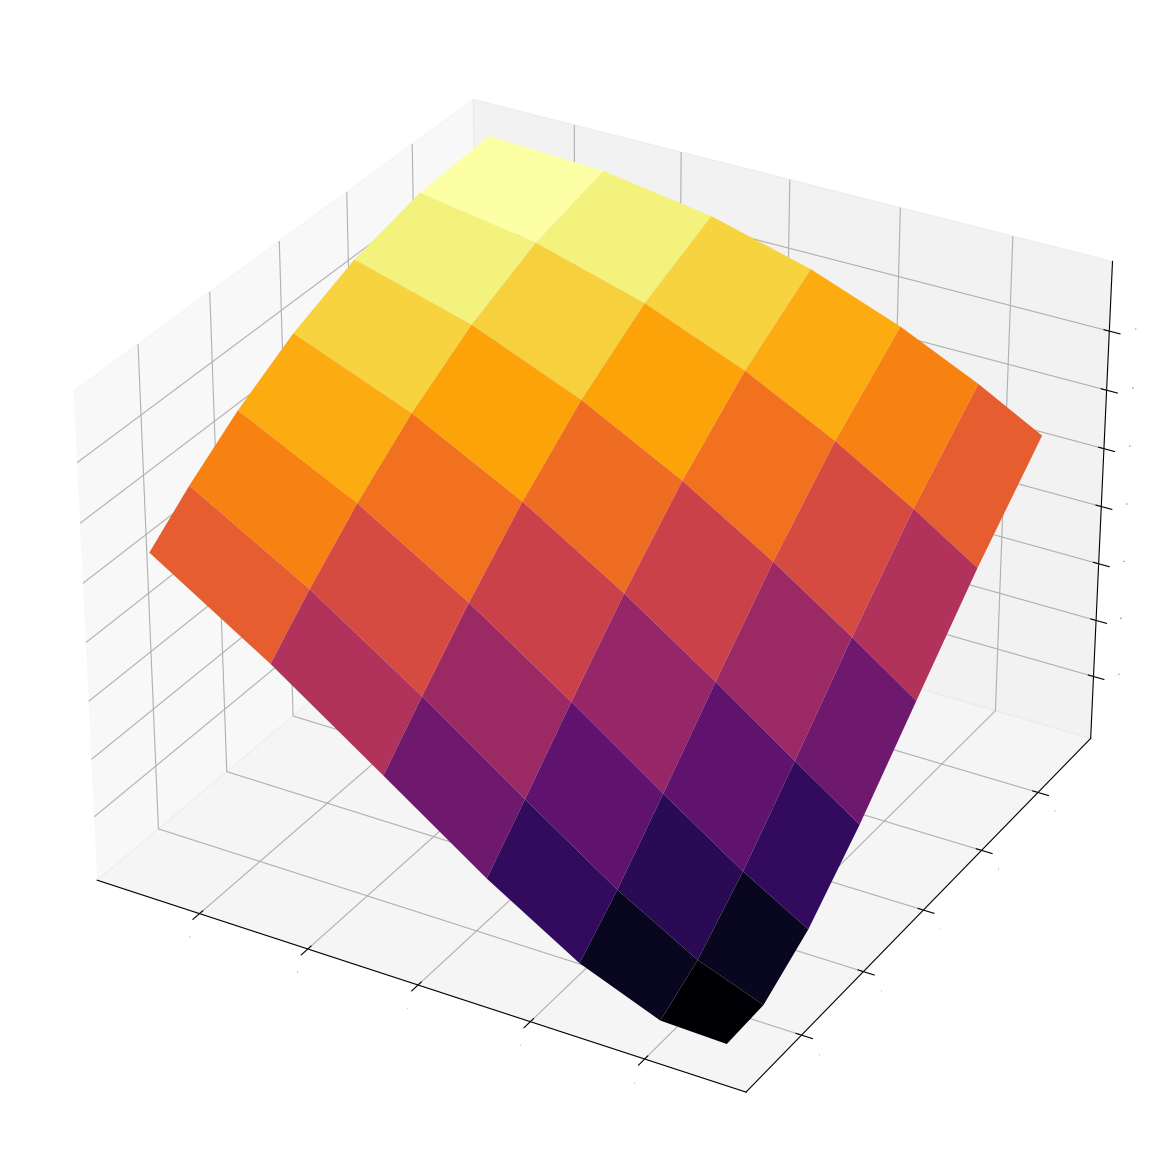

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (15,15)
# Create data
x = np.linspace(1, 5, 7)
y = np.linspace(1, 5, 7)
X, Y = np.meshgrid(x**1.5, y**1.5)
Z = -np.sin(np.sqrt(X + Y))

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
ax.plot_surface(X, Y, Z, cmap='inferno')

# Add labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('3D Area Graph')

ax.invert_xaxis()
ax.tick_params(axis='both', which='both', labelsize=1)

# Show plot
plt.show()


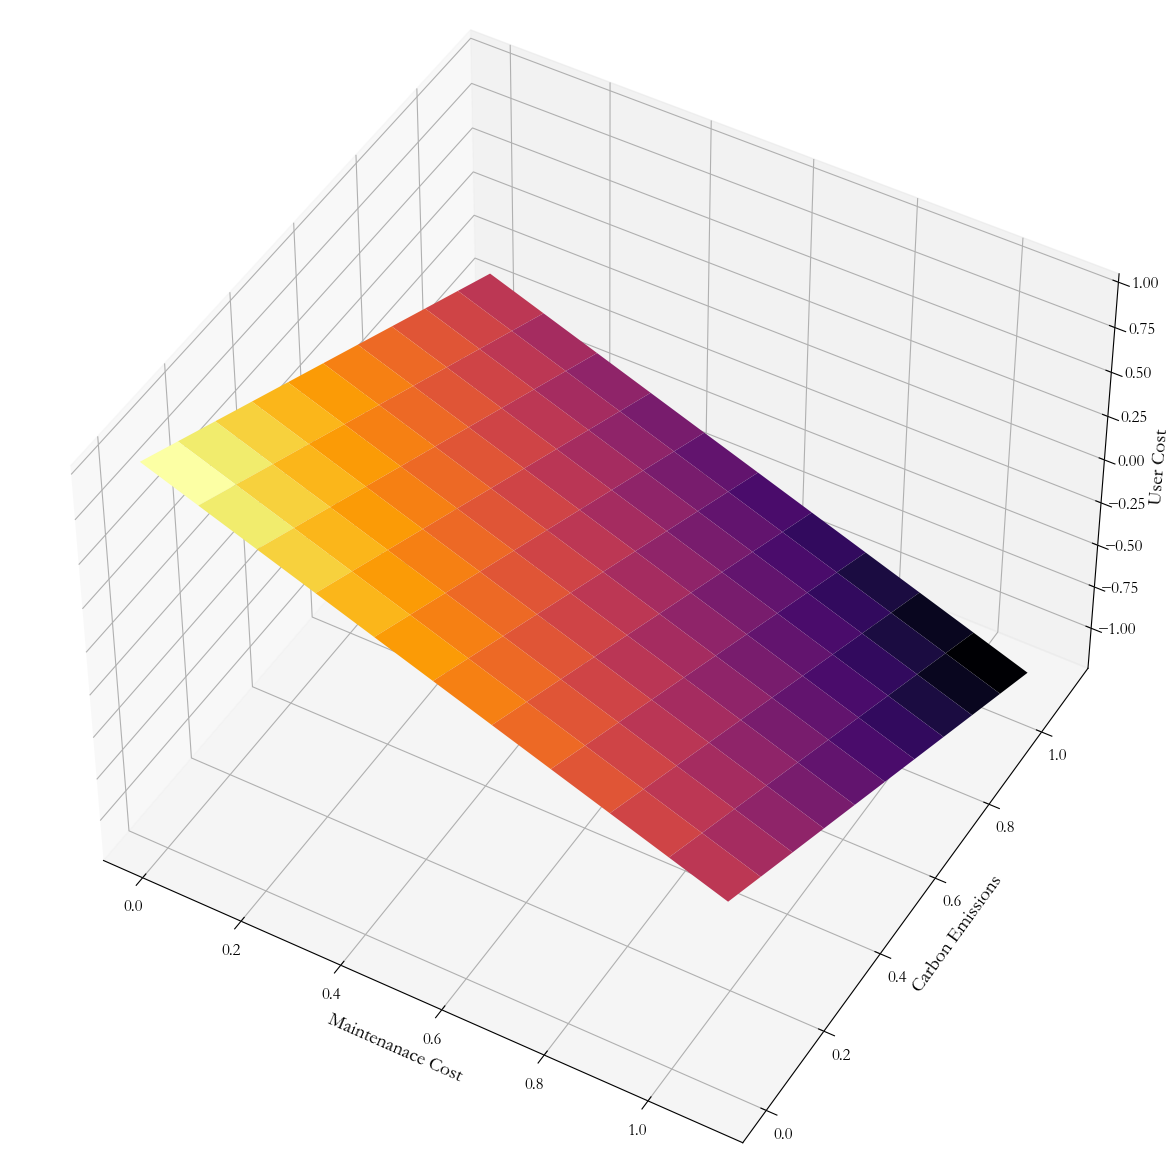

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (15,15)
# Create data
x = np.linspace(0, 1.1, 11)
y = np.linspace(0, 1.1, 11)
X, Y = np.meshgrid(x, y)
Z = 1 - X - Y

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
ax.plot_surface(X, Y, Z, cmap='inferno')

# Add labels and title
ax.set_xlabel('Maintenanace Cost', size=14)
ax.set_ylabel('Carbon Emissions', size=14)
ax.set_zlabel('User Cost', size=14)
# ax.set_title('3D Area Graph')

# ax.invert_xaxis()
ax.tick_params(axis='both', which='both', labelsize=12)

ax.view_init(elev=45, azim=-60)

plt.show()
# Show plot

In [56]:
def plot_interactive(ccs, 
                     obj=[0, 1, 2], 
                     labels=["Lifecycle maintenance cost", "Lifecycle carbon emissions", "Lifecycle user cost"],
                     size=[1000, 1000]):

    ccs_arr = np.stack(ccs)
    df = pd.DataFrame({labels[0]: ccs_arr[:, 0], labels[1]: ccs_arr[:, 1], labels[2]: ccs_arr[:, 2]})

    if len(obj) == 3:
        fig = px.scatter_3d(df, x=labels[0], y=labels[1], z=labels[2], opacity=0.7)
    else:
        fig = px.scatter(df, x=labels[obj[0]], y=labels[obj[1]], opacity=0.7)

    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=size[0], height=size[1])
    fig.show()
    return fig

In [57]:
plot_interactive(points_arr)

NameError: name 'points_arr' is not defined

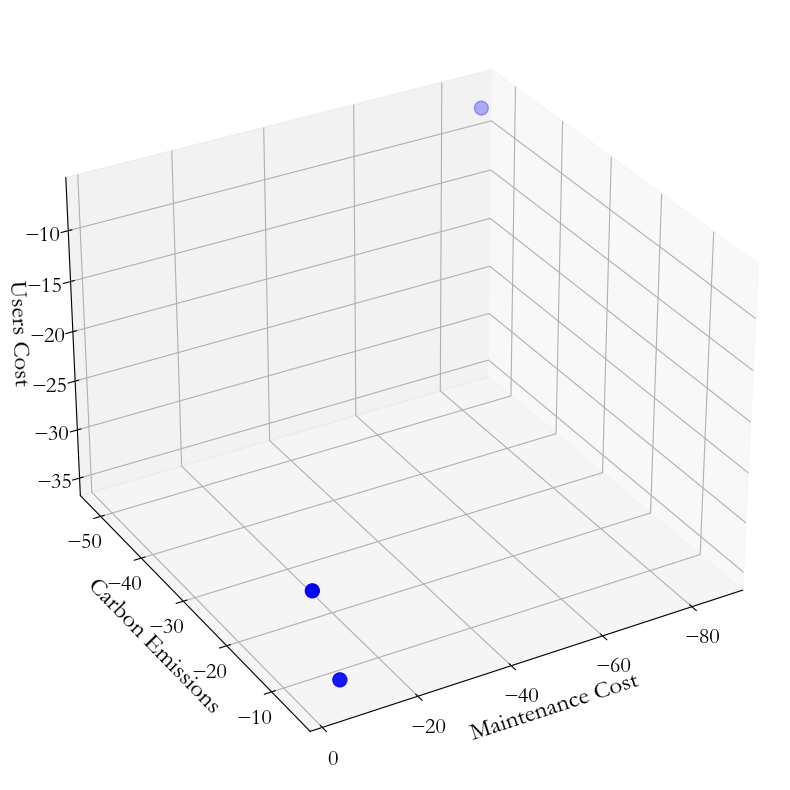

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (10,10)
# THE RA p-points
# # Generate data
# points = []
# for i in range(0, 11):
#     for j in range(0, 11):
#         for k in range(0, 11):
#             if i + j + k == 10:
#                 points.append([i/10, j/10, k/10])
                
# points_arr = np.stack(points)

# # Normalize data
# x = points_arr[:, 0]
# y = points_arr[:, 1]
# z = points_arr[:, 2]

# THE VALUES FROM THE EXECUTIONS
cost_ret = [ -3.4686,-7.0826, -26.4261]
carbon_ret = [ -7.0209, -5.0903, -34.8009]
user_ret = [-85.5849, -51.717, -6.8879]

x = np.array([cost_ret[0], carbon_ret[0], user_ret[0]])
y = np.array([cost_ret[1], carbon_ret[1], user_ret[1]])
z = np.array([cost_ret[2], carbon_ret[2], user_ret[2]])


# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
ax.scatter(x, y, z, color="blue", s=100)

# Add labels and title
ax.set_xlabel('Maintenance Cost', size=18)
ax.set_ylabel('Carbon Emissions', size=18)
ax.set_zlabel('Users Cost', size=18)
# ax.set_title('3D Scatter Plot')

# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)

ax.view_init(elev=30, azim=60)
ax.tick_params(axis='both', which='both', labelsize=16)
# Show plot
plt.show()




In [59]:
points_arr

NameError: name 'points_arr' is not defined

## Policy realization to monitor states

In [60]:
os.chdir("C:/Users/goust/Documents/EARLY_YEARS/Master/TU Delft/Thesis_project/TUD_thesis_project/jupyter_notebooks/policy_realizations/")
os.getcwd()

'C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\TUD_thesis_project\\jupyter_notebooks\\policy_realizations'

In [61]:
# objective = "maintenance_cost" # real = 0
objective = "carbon_emissions" # real = 8
objective = "user_cost" # real = 0
y_labels = {"maintenance_cost": "Maintenance cost", "carbon_emissions": "Carbon emissions", "user_cost": "User cost"}
y_label = y_labels[objective]


# Maintenance cost
objective = "maintenance_cost"
real = 0
y_label_cost = y_labels[objective]
    
actions_cost = np.loadtxt(f'{objective}/greenlight_cost_action.csv', delimiter=",").reshape(100, 20, 10)[real]
rewards_cost = np.loadtxt(f'{objective}/greenlight_cost_rew.csv', delimiter=",")
states_cost =  np.loadtxt(f'{objective}/greenlight_cost_states.csv', delimiter=",").reshape(100, 20, 10, 5)
states_max_cost = np.argmax(states_cost[real], axis=2)

# Carbon emissions
objective = "carbon_emissions"
real = 9
y_label_carbon = y_labels[objective]

actions_carbon = np.loadtxt(f'{objective}/greenlight_cost_action.csv', delimiter=",").reshape(100, 20, 10)[real]
rewards_carbon = np.loadtxt(f'{objective}/greenlight_cost_rew.csv', delimiter=",")
states_carbon =  np.loadtxt(f'{objective}/greenlight_cost_states.csv', delimiter=",").reshape(100, 20, 10, 5)
states_max_carbon = np.argmax(states_carbon[real], axis=2)

# User cost
objective = "user_cost"
real = 8
y_label_user = y_labels[objective]

actions_user = np.loadtxt(f'{objective}/greenlight_cost_action.csv', delimiter=",").reshape(100, 20, 10)[real]
rewards_user = np.loadtxt(f'{objective}/greenlight_cost_rew.csv', delimiter=",")
states_user =  np.loadtxt(f'{objective}/greenlight_cost_states.csv', delimiter=",").reshape(100, 20, 10, 5)
states_max_user = np.argmax(states_user[real], axis=2)

In [62]:
# xx = np.reshape(states[0], (20, 10, 5))
# states_max = np.argmax(states[real], axis=2)

component 1


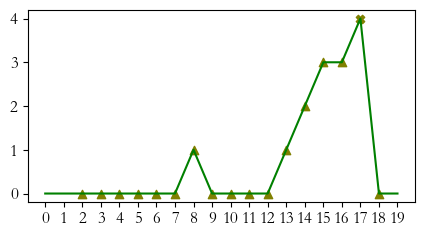

component 2


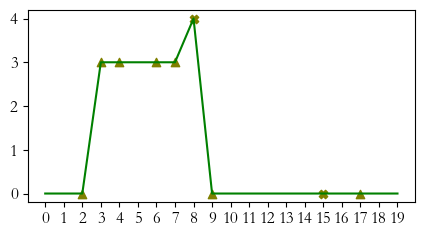

component 3


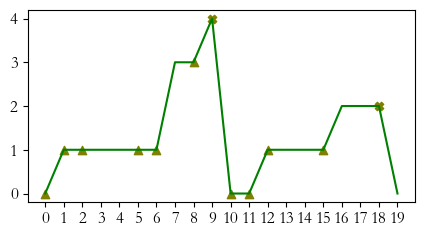

component 4


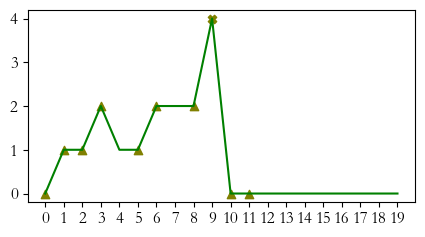

component 5


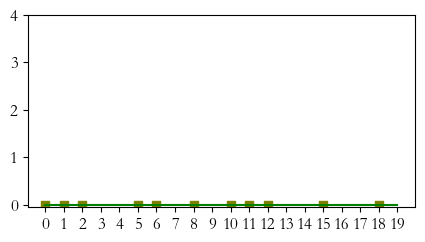

component 6


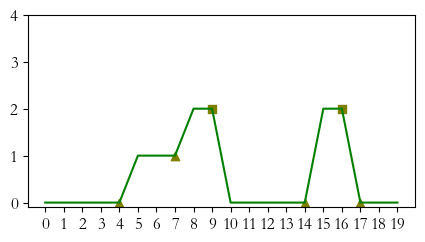

component 7


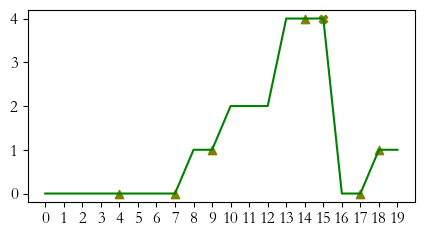

component 8


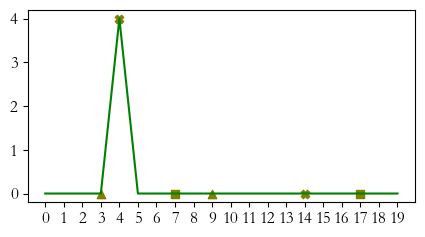

component 9


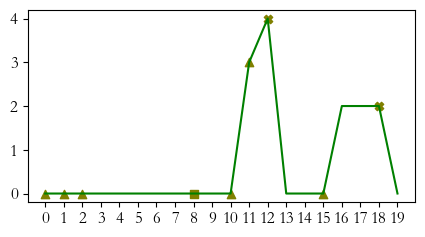

component 10


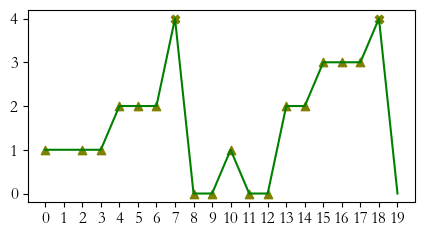

In [63]:
markers = {2: 's', 6:'^', 8:'D', 9: "X"}
plt.rcParams["figure.figsize"] = (5,2.5)
for i in range(10):
    print(f"component {i+1}")
    
    # Maintenance cost
#     plt.plot(states_max_cost[:, i], color="blue")
#     for j in range(1, actions_cost.shape[0]):
#         if actions_cost[j, i] != 0:
#             plt.scatter([j-1], [states_max_cost[j-1, i]], marker=markers[actions_cost[j,i]], c="olive")
            
    # Carbon emissions
    plt.plot(states_max_carbon[:, i], color="green")
    for j in range(1, actions_carbon.shape[0]):
        if actions_carbon[j, i] != 0:
            plt.scatter([j-1], [states_max_carbon[j-1, i]], marker=markers[actions_carbon[j,i]], c="olive")
            
# #     # User cost
#     plt.plot(states_max_user[:, i], color="magenta")
#     for j in range(1, actions_user.shape[0]):
#         if actions_user[j, i] != 0:
#             plt.scatter([j-1], [states_max_user[j-1, i]], marker=markers[actions_user[j,i]], c="olive")
            
#     plt.ylabel("IRI", fontsize=12)
#     plt.xlabel("Timestep", fontsize=12)
    plt.yticks([0, 1, 2, 3, 4], size=12)
    plt.xticks(range(20), size=12)
    plt.show()

In [64]:
states_max_user.shape

(20, 10)

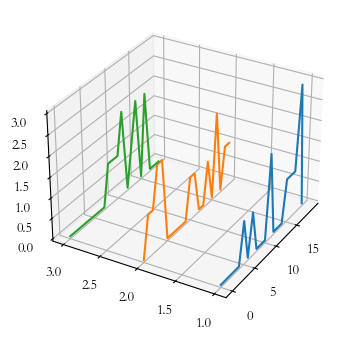

In [65]:
plt.rcParams["figure.figsize"] = (7.5,4)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(3):
    ax.plot(np.arange(20), states_max_cost[:, i], i+1, zdir='y')
    
ax.view_init(elev=30, azim=-150)
plt.show()

In [134]:
data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

11.0

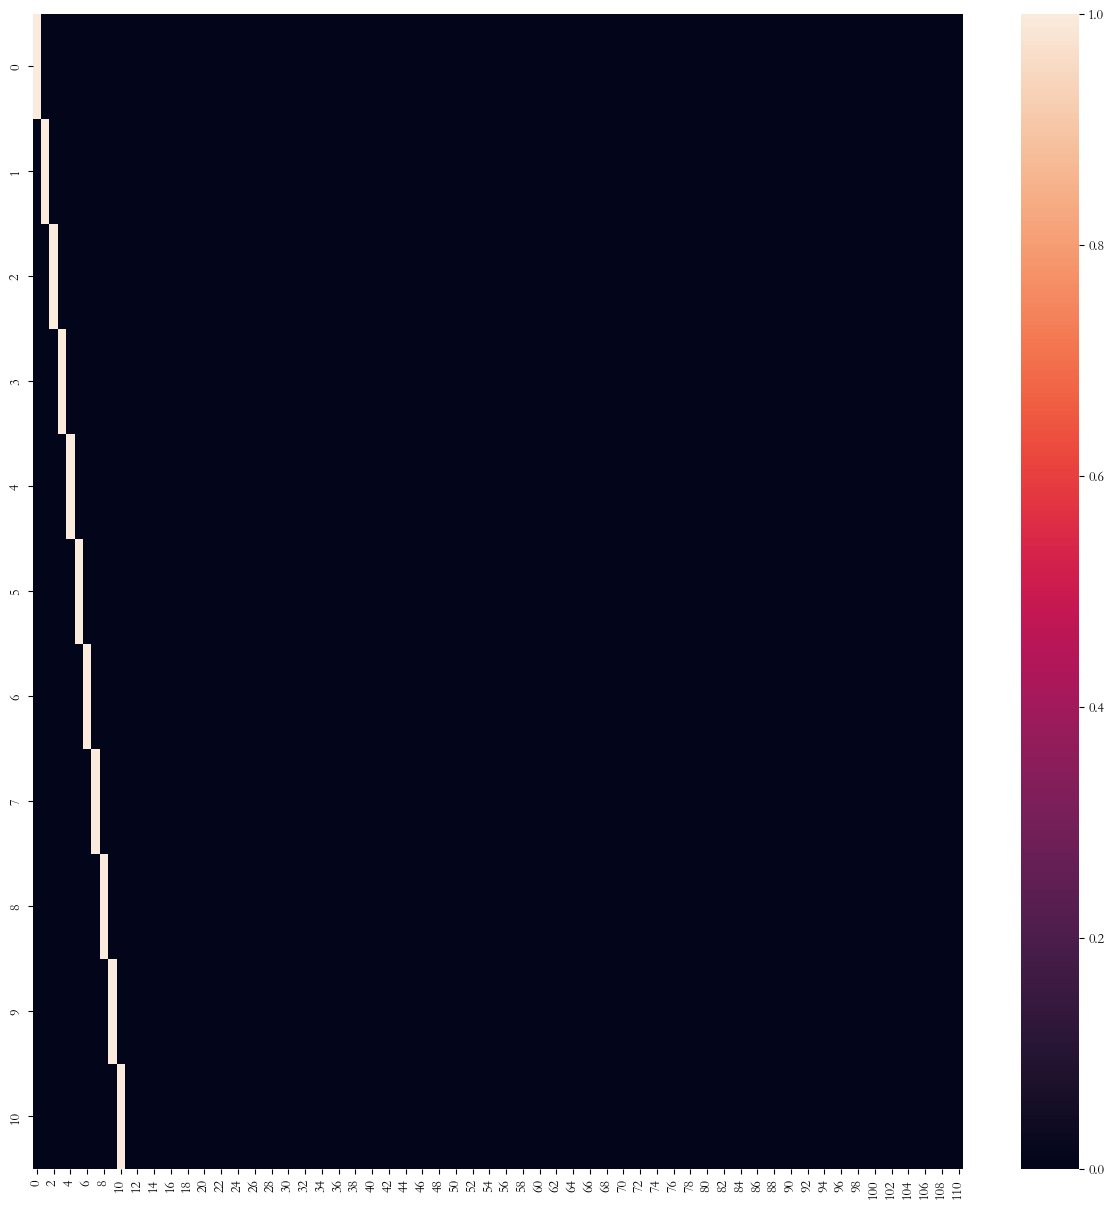

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns

X = np.arange(0, 11, 1)
Y = np.arange(0, 11, 1)

data = np.zeros((11, 111))

# or use meshgrid instead
for i, x in enumerate(X):
    for j, y in enumerate(Y):
#         print(i, j)
        if i==j:
#         if np.random.rand() > 0.2:
            data[i, j] = 1

# df = pd.DataFrame(data, index=Y, columns=X)

sns.heatmap(data)
data.sum()